# Goals of this Notebook

To learn:
- How to effectively iterate through elements in data structures
  - <code>for</code> and <code>while</code> loop
- How to access data programmatically
- Useful Python functions and techniques
- Python skills for large data sets
- Skills for readable programming code
- How to measure code speed and memory usage
  - ... in order to increase speed and reduce memory usage
  
While the <font face='courier'>numpy</font> and <font face='courier'>pandas</font> packages have utilities for inputting data into <code>arrays</code> and <code>DataFrames</code>, respectively, programmers need to often input data files with base Python statements, and so we will demonstrate how to do that.  This knowledge is also essential for understanding what <font face='courier'>numpy</font> and <font face='courier'>pandas</font> are doing under the covers.   In addition, data input provides a good opportunity for gaining experience with <code>for</code> loops which you will use in virtually every program you write.   

In addition, while the <font face='courier'>numpy</font> and <font face='courier'>pandas</font> packages ease data acquisition, they hide important details from you which are very important to know.  So, if you understand how to input data with base Python, then you will be in a better position to troubleshoot problems you might have with inputting data with <font face='courier'>numpy</font> and <font face='courier'>pandas</font>.

Specific techniques
- Generators, iterators, and iterables
  - Including <code>itertools</code> package, <code>enumerate()</code> and <code>iter()</code>
  - Handling large files
- Code profiling
  - Speed: <code>line_profiler</code>, <code>timeit</code>, <code>time</code> package
  - Memory: <code>memory_profiler</code>, <code>memit</code>, <code>\_\_sizeof\_\_</code> package
  
# Topics & Navigation <a name='navigation' />
- <a href = #data_for_loop>Text File Input with For Loops</a>
- <a href = #OtherComp>Comprehension Methods</a>
  - <a href = #ListComprehension>List Comprehension</a>
  - <a href = #DictComp>Dictionary Comprehension</a>
  - <a href = #SetComp>Set Comprehension</a>
- <a href = #ItItGen>Iterables, Iterators, Generators, and the * Operator</a>
  - <a href = #Iterables>Iterables</a>
  - <a href = #Iterators>Iterators</a>
  - <a href = #Generators>Generators</a>
- <a href = #enumerate>For loops with <code>enumerate</code></a>
- <a href = #zip_map_filter><code>zip()</code>, <code>map()</code>, and <code>filter()</code> Functions</a>
  - <a href = #asterisk_op><code>*</code> Operator</a>
  - <a href = #zip><code>zip()</code> Function</a>
  - <a href = #map><code>map()</code> Function</a>
  - <a href = #filter><code>filter()</code> Function</a>
  - <a href = #apps_zip_map_filter>Applications of <code>zip()</code>, <code>map()</code>, and <code>filter()</code></a>
- <a href = #text_w_gen>Text File Input with Base Python Generators</a>
- <a href = #comp_w_gen>Computations on Large Text Files with Generators</a>
  - <a href = #mv_avg>Moving Average Computation</a>
  - <a href = #nyc>NYC Taxi Data (Variance)</a>
  - <a href = #1_2_pass>One-pass versus Two-pass Computations</a>
- <a href = #time_mem>Measuring Execution Time and Memory Usage</a>
  - <a href = #time>Execution Time</a>
  - <a href = #memory>Memory Usage</a>
- <a href = #text_w_gen>Text File Input with Base Python Generators</a> 
- <a href = #loops><font face='courier'>for</font> loop review</a> 
- <a href = #aliasing>Aliasing</a>

# Code Development

Code is developed is stages with varying objectives depenedent on the development stage:
- Get it working
  - The code runs without errors
- Get it working correctly
  - Get correct output for all inputs
- Increase code speed and reduce memory usage
  - Optimize the code

In every stage:
- Make code more readable
  - Variable names
  - Comments
  - Succinct
    - Reduce the number of lines and line length
  - Simplicity
    - Use the simplest approach and the best variable types

    



# Data Input with For Loops <a name='data_for_loop' />
Back to <a href = '#navigation'>Navigation</a>

## Full Disclosure

As discussed previously, there exist easier ways to read data files into Python with <font face='courier'>numpy</font> and <font face='courier'>pandas</font> than using <code>for</code> loops, as shown below.

It is best in many circumstances, however, to input data with base Python commands and avoiding learning this technique will be to your detriment later on.  Besides inputting data and learning basic Python text cleansing at the same time, competence with <code>for</code> loops is important basis for learning:
- List comprehension
- Dictionary and set comprehension
- Generators and iterators

In [2]:
import numpy as np
import pandas as pd

In [3]:
np_nw1999 = np.genfromtxt('files/NorfolkWeather1999.csv', delimiter = ',')
np_nw1999[:5]

array([[ 0., 32.],
       [ 1., 43.],
       [ 2., 55.],
       [ 3., 38.],
       [ 4., 26.]])

In [4]:
df_nw2018 = pd.read_csv('files/NorfolkWeather2018.csv', names = ['index', 'temp'], index_col = 'index')
df_nw2018[:5]

temp
index      
0      23.0
1      22.0
2      24.0
3      29.0
4      22.0

# Handling Data with Basic Python


The first statement in the cell below causes <font face = 'courier'>matplotlib</font> graphs to be rendered within the Jupyter notebook.  The second statement imports <font face = 'courier'>matplotlib</font>.

__Note:__ Commands that start with either <code>%</code> or <code>%%</code> are called magic commands.  These are not Python statements but, rather, cause the Jupyter environment or code cell to be changed, most often by loading additional functionality.  A single percent sign, <code>%</code>, indicates commands that apply only to the arguments on that same line, whereas commands starting with <code>%%</code> apply to all the code in a cell in which it is placed as the first line.    

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt 

## 1D Data


* In a nutshell
  * 1-dimensional time series data
  * Inputting data from text file
  * Computing moving average

_Time series data_ are data that are collected over time at constant intervals.  Examples include, daily or hourly weather data, daily sales of an item or all company sales in total (either in units or dollar volume), number of daily visits to a web site, and annual gross domestic product.

One issue that arises with time series data is to summarize the pattern over time despite there being frequent highs and lows (noise) and highs and lows over longer periods (either economic cycles or seasonal effects).  The _moving average_ is frequently used to summarize the trend that is muddied by noise over the short-term.

We will work with inputting two 1D time series from two text files.
- <code>NorfolkWeather1999_1.csv</code>
- <code>NorfolkWeather2008_1.csv</code>

Note that data read from text files is always interpreted as string data.  It must be converted to numerical quantitites for plotting. 

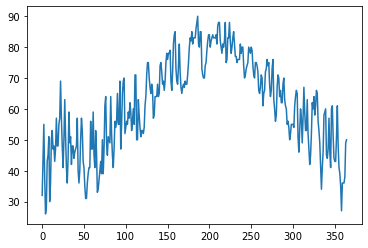

In [42]:
f = open('files/NorfolkWeather1999_1.csv','r')
nw1999 = f.readlines()
f.close()

for i in range(len(nw1999)):
    nw1999[i] = float(nw1999[i])

x = range(len(nw1999))
plt.plot(x, nw1999, label = '1999')
plt.show()

Now, input the 2018 data.  Multiple series can be plotted by having multiple <code> plt.plot()</code> statements.

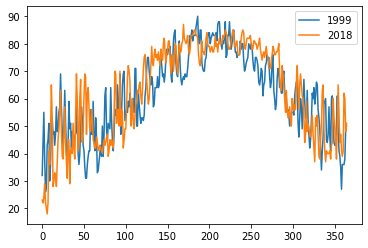

In [43]:
f = open('files/NorfolkWeather2018_1.csv','r')
nw2018 = f.readlines()
f.close()

y2018 = []

for i in range(len(nw2018)):
    nw2018[i] = float(nw2018[i])

""" Plot both data series """
plt.plot(x, nw1999, label = '1999')
plt.plot(x, nw2018, label = '2018')
plt.legend()
plt.show()

## A 1D Data Application: The Moving Average

Let our time series data be collected for time indices $d \in \left\lbrace 0, ... , D-1 \right\rbrace$, where $d$ stands for the index for a given day. We will be considering daily time series for a year, so $D=365$.  A moving average, $ma_n(d)$ of $n$ days for day $d$ is defined as:

$ma_n(d) = \frac{1}{n} \Sigma_{i = d-n+1}^d t(i)$

where $t(d)$ is the average temperature for day $d$.  Note that $ma(d)$ is defined only for day in this range: $d \in \left\lbrace n-1, \ldots ,    D-1 \right\rbrace$.

Click on the image below to see a visualization of how a moving average is computed in a way that may be more clear than the math above.

[![Moving Average Animation](https://img.youtube.com/vi/rq__3P_rs4M/0.jpg)](https://www.youtube.com/watch?v=rq__3P_rs4M)

The files <font face = 'courier'>NorfolkWeather1999.csv</font> and <font face = 'courier'>NorfolkWeather2018.csv</font>  have the daily average temperatures for the years indicated in the filenames.  Load each of these text files into a list (load only the daily average temperature and not the row index), and then create new lists, <font face = 'courier'>ma1999</font> and <font face = 'courier'>ma2018</font>, that are 10-day moving averages of the original data.

Although we are not focusing on plotting in this session, we will compare the two moving average series using the <font face = 'courier'>matplotlib</font> package.

Let's compute and plot the moving averages of the two data series using <font face = 'courier'>for</font> loops and compare the two results.

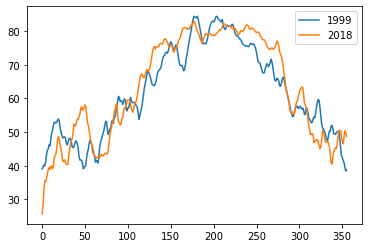

In [44]:
''' period: 
      * a variable representing the number of periods that are averaged together to create
        the moving average 
      * Given the zero-based indexing of Python, the first moving average can be computed
        in Period period - 1 '''
period = 10

ma1999 = []  # Initialize moving average list for 1999
ma2018 = []  # Initialize moving average list for 2018

for i in range(0, len(nw1999) - period + 1):
    ma1999.append(sum(nw1999[i:i + period])/period)
    ma2018.append(sum(nw2018[i:i + period])/period)

plt.plot(ma1999, label = '1999')
plt.plot(ma2018, label = '2018')
plt.legend()

plt.show()

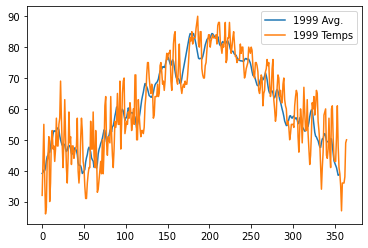

In [45]:
plt.plot(ma1999, label = '1999 Avg.')
plt.plot(nw1999, label = '1999 Temps')
plt.legend()

plt.show()

## 2D Data Input

These files have two data elements per line, an integer index and a temperature, separated by commas.

- <code>NorfolkWeather1999.csv</code>
- <code>NorfolkWeather2008.csv</code>

We'll need to take extra care to split the elements of each line at the commas before we convert the data to numerical values.  __Please note that we do not split the data when there exists only one element per row, but we do need split row elements apart when multiple are in each row of data.__

Also, please not the improved method of opening files for input.  No <code>f.close()</code> statement is needed as the file is implicitly closed after completion of the code within the <code>with</code> block.  The same method can be used also when writing to files.

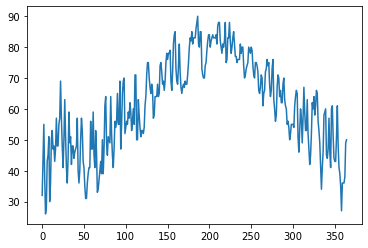

In [15]:
with open('files/NorfolkWeather1999.csv','r') as f:
    nw1999 = f.readlines()

x = []
y1999 = []

for i in range(len(nw1999)):
    nw1999[i] = nw1999[i].strip()
    nw1999[i] = nw1999[i].split(',')
    x.append(int(nw1999[i][0]))
    y1999.append(float(nw1999[i][1]))

plt.plot(x, y1999, label = '1999')
plt.show()

Now, input the 2018 data.

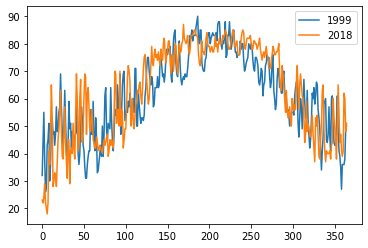

In [16]:
with open('files/NorfolkWeather2018.csv','r') as f:
    nw2018 = f.readlines()

y2018 = []

for i in range(len(nw2018)):
    nw2018[i] = nw2018[i].strip()
    nw2018[i] = nw2018[i].split(',')
    y2018.append(float(nw2018[i][1]))

""" Plot both data series """
plt.plot(x, y1999, label = '1999')
plt.plot(x, y2018, label = '2018')
plt.legend()
plt.show()

## Generalized 2D Input

Rows of data most often will have more than two elements in which case it makes sense to loop through the row elements with a <code>for</code> loop rather than converting the row elements explicitly, a shown below.

For this exercise we will use the data file named <font style="font-family:'courier'">long_2d.csv</font>.

In [1]:
with open('files/long_2d.csv','r') as f:
    data = f.readlines()
    
for i in range(len(data)):
    data[i] = data[i].strip().split(',')  #Get rid of \n and break row data aprat at the commas
    for j in range(len(data[i])): # each data[i] now is a list of multiple elements, iterate through them
        data[i][j] = int(data[i][j])  # Inspect the data file: these data are integers
        
data

[[95, 64, 27, 81, 9, 76, 71, 17, 20, 95],
 [57, 22, 29, 73, 90, 23, 0, 7, 100, 48],
 [74, 75, 31, 21, 89, 8, 17, 23, 64, 4],
 [99, 20, 3, 50, 58, 45, 51, 84, 24, 34],
 [29, 19, 0, 67, 34, 81, 75, 84, 65, 27],
 [22, 6, 97, 11, 34, 25, 48, 85, 81, 28],
 [93, 21, 11, 63, 16, 60, 88, 4, 94, 56],
 [54, 33, 64, 18, 89, 85, 53, 26, 70, 62],
 [20, 59, 30, 65, 91, 81, 78, 36, 1, 52],
 [40, 52, 20, 5, 55, 82, 7, 36, 33, 26],
 [24, 5, 54, 100, 42, 51, 23, 88, 95, 15],
 [53, 98, 13, 96, 42, 58, 86, 12, 5, 42],
 [58, 5, 44, 10, 18, 60, 5, 16, 85, 84],
 [7, 23, 5, 60, 82, 61, 99, 86, 3, 10],
 [25, 48, 34, 64, 72, 2, 87, 91, 1, 16],
 [70, 90, 88, 22, 78, 76, 24, 56, 73, 8],
 [83, 20, 94, 0, 69, 73, 49, 2, 24, 73],
 [10, 69, 32, 90, 15, 10, 31, 35, 98, 14],
 [12, 68, 1, 44, 85, 31, 32, 46, 26, 90],
 [50, 5, 53, 71, 24, 58, 40, 22, 97, 35],
 [22, 12, 92, 59, 21, 56, 62, 75, 97, 27],
 [97, 62, 65, 11, 81, 21, 85, 59, 63, 56],
 [75, 24, 39, 80, 34, 7, 55, 41, 62, 91],
 [17, 58, 36, 62, 72, 1, 85, 100, 54

## An Improvement

The first improvement we will make to this code is to reduce its number of lines by chaining commands, or executing multiple commands on the same line, specifically the  <font style="font-family:'courier'">.strip()</font> and <font style="font-family:'courier'">.split()</font> functions.

Here is a version of the code with chained commands.  Chained commands reduce the number of lines needed.  How do the chained commands affect readability of the code in your opinion?

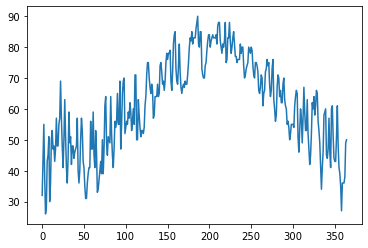

In [17]:
with open('files/NorfolkWeather1999.csv','r') as f:
    nw1999 = f.readlines()

x = []
y1999 = []

for i in range(len(nw1999)):
    nw1999[i] = nw1999[i].strip().split(',')
    x.append(int(nw1999[i][0]))
    y1999.append(float(nw1999[i][1]))

plt.plot(x, y1999, label = '1999')
plt.show()

The two code blocks could be combined and the repetitive cleansing steps can be put into a function to clean up the code.  The function name <code>ssc()</code> is and acronym for strip, split, and convert.

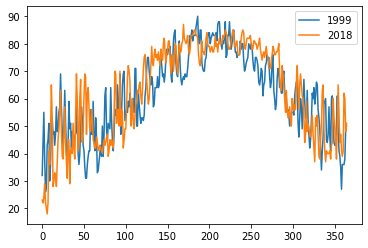

In [35]:
def ssc(data):
    x = []
    y = []
    for i in range(len(data)):
        data[i] = data[i].strip().split(',')
        x.append(int(data[i][0]))
        y.append(float(data[i][1]))
    return x, y
    
with open('files/NorfolkWeather1999.csv','r') as f:
    nw1999 = f.readlines()

with open('files/NorfolkWeather2018.csv','r') as f:
    nw2018 = f.readlines()

x, y1999 = ssc(nw1999)
x, y2018 = ssc(nw2018)
plt.plot(x, y1999, label = '1999')
plt.plot(x, y2018, label = '2018')
plt.legend()
plt.show()

We can clean up the code and reduce the chance of an error by using the <code>with</code> statement.

## Chaining Commands

Commands can be chained done whenever a command returns the data that is being manipulated, which sometimes is not case.  When an executed statement does not return the the data, then we say the operation is being executed _in place_.  

Using <code>sort()</code> with a list is an _in place_ operation: it sorts the list for next time we access it, but it does not return the list so that, if we wanted, we could assign the sorted list to another variable.

Using <font style="font-family:'courier'">.strip()</font> and <font style="font-family:'courier'">.split()</font> do return the revised data, as shown below, so they are not _in place_ operations.

In [30]:
my_list = [9, 8, 7, 6]
result = my_list.sort()
print(result)

None


In [31]:
my_list

[6, 7, 8, 9]

In [32]:
my_input = '1, 2, 3, 4, 5'
print('Split data;', my_input.split())
print(my_input)

Split data; ['1,', '2,', '3,', '4,', '5']
1, 2, 3, 4, 5


## 2D Data Input: An Alternative

It is desirable, sometimes to keep both the <code>x</code> and <code>y</code> data in the same data structure, which we will do in the examples below using the same data.  One advantage is that is eliminates the memory usage for additional variables.  Data can sometimes be used directly in this form, although we will need to process it further before plotting in our case. We will show some much better ways to do this processing later.

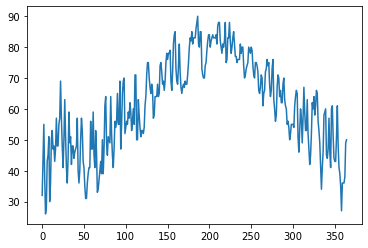

In [46]:
def ssc_2d(data):
    for i in range(len(data)):
        data[i] = data[i].strip().split(',')
        data[i][0] = int(data[i][0])
        data[i][1] = float(data[i][1])
    return data

with open('files/NorfolkWeather1999.csv','r') as f:
    nw1999 = f.readlines()
nw1999 = ssc_2d(nw1999)

''' Create x and y series data '''
x = []
y1999 = []
for point in nw1999:
    x.append(point[0])
    y1999.append(point[1])
    
plt.plot(x, y1999, label = '1999')
plt.show()

This function is not flexible, however, and we would need to write a new function each time we wanted to convert data in an input file depending on how many fields were in the data and what types we wanted to convert them to.  The conversion function can be made more flexible by supplying it with the data for conversion in the form of a dictionary with its keys equal to the column indices and its values indicating the data types.

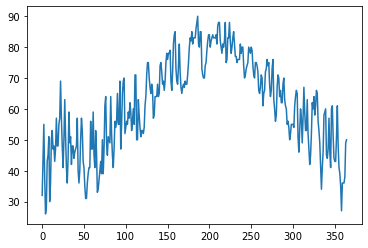

In [298]:
def ssc_2d_map(convert, data):
    for i in range(len(data)):
        data[i] = data[i].strip().split(',')
        for j, mk_type in convert.items():
            data[i][j] = mk_type(data[i][j])
    return data

with open('files/NorfolkWeather1999.csv','r') as f:
    nw1999 = f.readlines()

''' convert_map dictionary: key = filed index; value = data type'''
convert_map = {0:int, 1:float}
nw1999 = ssc_2d_map(convert_map, nw1999)

''' Create x and y series data '''
x = []
y1999 = []
for point in nw1999:
    x.append(point[0])
    y1999.append(point[1])
    
plt.plot(x, y1999, label = '1999')
plt.show()

## 2D Input Exercise

In this case we will read in a matrix or array of values from the file <code>matrix.csv</code>.  Create a list of lists where each sublist contains the elements form each row of the data file.  The first cell generates random values using <code>numpy</code>.

In [26]:
import numpy as np

x = np.random.randint(27,size=100).reshape(10,10).astype(np.int)
np.savetxt('files/matrix.csv', x, fmt='%2d')
x

array([[ 0, 17, 21,  3, 21, 22, 18,  4, 10, 20],
       [11,  0,  9, 17, 10,  8,  1, 21, 25,  5],
       [10, 15,  2, 14, 14, 12, 23, 12,  6, 24],
       [15,  8,  4,  6, 15, 19, 24,  6,  3, 26],
       [21,  8, 11,  6, 14,  1, 26, 10, 13,  2],
       [12, 22, 12,  4,  1,  0, 13,  1, 12, 18],
       [ 2, 23,  9,  1,  1, 13, 10, 18, 23,  9],
       [15,  3, 23,  8, 24, 17, 19,  1, 23,  9],
       [12,  3, 25,  1, 25,  4, 20,  7,  0, 11],
       [ 0, 17, 11, 13, 22,  1, 12,  9,  6,  1]])

In [27]:
with open('files/matrix.csv', 'r') as f:
    data = f.readlines()

''' Let us finish the code here '''
data

[[0, 17, 21, 3, 21, 22, 18, 4, 10, 20],
 [11, 0, 9, 17, 10, 8, 1, 21, 25, 5],
 [10, 15, 2, 14, 14, 12, 23, 12, 6, 24],
 [15, 8, 4, 6, 15, 19, 24, 6, 3, 26],
 [21, 8, 11, 6, 14, 1, 26, 10, 13, 2],
 [12, 22, 12, 4, 1, 0, 13, 1, 12, 18],
 [2, 23, 9, 1, 1, 13, 10, 18, 23, 9],
 [15, 3, 23, 8, 24, 17, 19, 1, 23, 9],
 [12, 3, 25, 1, 25, 4, 20, 7, 0, 11],
 [0, 17, 11, 13, 22, 1, 12, 9, 6, 1]]

# Reshaping Data Arrays

The <font face='courier'>numpy</font> package can reshape data arrays, and you will use this utility in the artiificial Intelligence course.  Reshaping applied to a 2-dimensional array or list of lists that has 4 rows and 4 columns, for example, means to restructure the 16 elements in an array with different numbers of rows or columns.  A 4 by 4 list of lists can be reshaped into a 16 by 1, 1 by 16, 8 by 2, or a 2 by 8 list of lists.

Write code to reshape the 4 by 4 array named <font face='courier'>a</font> below into an 8 by 2 list of lists named <font face='courier'>b</font>.  You may use <code>for</code> loops or list comprehension.

In [1]:
a = [[0,1,2,3],[4,5,6,7], [8,9,10,11], [12,13,14,15]]

In [4]:
rows = 8
cols = 2

# Flatten the list of lists: 1 by 16
temp = []
for row in a:
    for ele in row:
        temp.append(ele)
print(temp)

b = []
for r in range(rows):
    newRow = []
    for c in range(cols):
        newRow.append(temp[r*cols + c ])
    b.append(newRow)
print(b)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
[[0, 1], [2, 3], [4, 5], [6, 7], [8, 9], [10, 11], [12, 13], [14, 15]]


## From Loops to List Comprehesion <a name='ListComprehension' />
Back to <a href = '#navigation'>Navigation</a>

List comprehension is a technique for condensing the number of statements required to create a new list using for loops.  

- More succinct code
- More readable code
- Faster than <code>for</code> loops

The cells immediately below demonstrate the simplest form of list comprehension.

In [11]:
import random
numElements = 10
newList = []

for i in range(numElements):
    newList.append(random.random())
newList

[0.2928597030542778,
 0.9270524879623784,
 0.0970768479915195,
 0.905487853822201,
 0.9155884907867351,
 0.54842618759238,
 0.7634497869224391,
 0.7813474433754127,
 0.1710840797423352,
 0.19486150198586705]

The method for compacting a for loop into a list comprehension state is illustrated below.

![List Comprehension Structure](images/listComprehension1.jpg)
![List Comprehension Example](images/listComprehension.jpg)

In [ ]:
import random
numElements = 10

newList1 = [random.random() for i in range(numElements)]
newList1

Logic can be applied within list comprehension statements to filter the elements appended to the list.

In [13]:
newList2 = []

for i in range(21):
    if i % 2 ==0:
        newList2.append(i)
newList2

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]



![List Comprehension Structure w/Logic](images/listComprehension2.jpg)

For example, we could use the following code if we wanted to create a list of even numbers through 20.

In [14]:
newList3 = [i for i in range(21) if i%2 == 0]
newList3

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

Compound Boolean filtering logic can be used as well.

In [15]:
newList4 = [i for i in range(21) if i%2 == 0 and i>7]
newList4

[8, 10, 12, 14, 16, 18, 20]

More complex <code>if-elif-else</code> logic can be implemented, although having multiple levels can make the statement difficult to read.

Notice that the location of the Boolean statement changes when the <code>else</code> is introduced.

In [47]:
newList5 = []
for i in range(21):
    if i % 2 == 0:
        newList5.append(i)
    else:
        newList5.append('')

newList5

[0, '', 2, '', 4, '', 6, '', 8, '', 10, '', 12, '', 14, '', 16, '', 18, '', 20]


![List Comprehension Structure w/If-Else](images/list_comp_if_else.jpg)


In [17]:
newList5 = [i if i % 2 == 0 else '' for i in range(21)]
newList5

[0, '', 2, '', 4, '', 6, '', 8, '', 10, '', 12, '', 14, '', 16, '', 18, '', 20]

In [20]:
data = [1, 2.1828, 'string', [0, 1, 2], (1,2), 2, 3.5]
newList6 = ['int' if isinstance(x, int) else 'float' if isinstance(x, float) else 'other' for x in data]
newList6

['int', 'float', 'other', 'other', 'other', 'int', 'float']

## Inputting Data and Computations with List Comprehension

The cell below refreshes our memory on one of the 2D functions for stripping, splitting, and converting data.  Let's revise it using list comprehension.

We will foreshadow our discussion on timing code with the use of the <code>%%timeit</code> function in two cells below.

In [49]:
%%timeit

def ssc_2d(data):
    for i in range(len(data)):
        data[i] = data[i].strip().split(',')
        data[i][0] = int(data[i][0])
        data[i][1] = float(data[i][1])
    return data

with open('files/NorfolkWeather1999.csv','r') as f:
    nw1999 = f.readlines()
nw1999 = ssc_2d(nw1999)
nw1999

329 µs ± 958 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [48]:
%%timeit

def ssc_2d(data):
    for i in range(len(data)):
        data[i] = data[i].strip().split(',')
    data = [[int(data[i][0]), float(data[i][1])] for i in range(len(data))]
    return data

with open('files/NorfolkWeather1999.csv','r') as f:
    nw1999 = f.readlines()
nw1999 = ssc_2d(nw1999)
nw1999[:5]

322 µs ± 2.98 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


We can perform the list comprehension using a different type of <code>for</code> loop.  Do you find this more readable?

In [16]:
def ssc_2d(data):
    for i in range(len(data)):
        data[i] = data[i].strip().split(',')
    data = [[int(point[0]), float(point[1])] for point in data]
    return data

with open('files/NorfolkWeather1999.csv','r') as f:
    nw1999 = f.readlines()
nw1999 = ssc_2d(nw1999)
nw1999[:5]

[[0, 32.0], [1, 43.0], [2, 55.0], [3, 38.0], [4, 26.0]]

We can also use list comprehension to strip and split the data.

In [50]:
%%timeit

def ssc_2d(data):
    data = [data[i].strip().split(',') for i in range(len(data))]
    data = [[int(point[0]), float(point[1])] for point in data]
    return data

with open('files/NorfolkWeather1999.csv','r') as f:
    nw1999 = f.readlines()
nw1999 = ssc_2d(nw1999)
nw1999[:5]

305 µs ± 1.82 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


or ...

In [51]:
%%timeit

def ssc_2d(data):
    data = [line.strip().split(',') for line in data]
    data = [[int(point[0]), float(point[1])] for point in data]
    return data

with open('files/NorfolkWeather1999.csv','r') as f:
    nw1999 = f.readlines()
nw1999 = ssc_2d(nw1999)
nw1999[:5]

290 µs ± 1.11 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


... or refactor the <code>ssc_2d()</code> function to take the filename as an input argument.

In [52]:
%%timeit 

def ssc_2d(file_name):
    with open(file_name,'r') as f:
        data = [line.strip().split(',') for line in f.readlines()]
        data = [[int(point[0]), float(point[1])] for point in data]
        return data

filename = 'files/NorfolkWeather1999.csv'
nw1999 = ssc_2d(filename)
nw1999[:5]

292 µs ± 1.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Note that using list comprehension is a bit faster than using <code>for</code> loops in this case.

... or perhaps the following, except that it is less readable.

In [53]:
%%timeit

def ssc_2d(data):
    return [[int(point[0]), float(point[1])] for point in [line.strip().split(',') for line in data]]

with open('files/NorfolkWeather1999.csv','r') as f:
    nw1999 = f.readlines()
nw1999 = ssc_2d(nw1999)
nw1999[:5]

292 µs ± 1.24 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## 2D Input Exercise (with List Comprehension)

Let's do this previous exercise, but with list comprehension.

In this case we will read in a matrix or array of values from the file <code>matrix.csv</code>.  Create a list of lists where each sublist contains the elements form each row of the data file.  The first cell generates random values using <code>numpy</code>.

## Computations with List Comprehension

The moving average computations with <code>for</code> loops can be done with list comprehension as well.

The first cell repeats our original code.

In [ ]:
''' period: 
      * a variable representing the number of periods that are averaged together to create
        the moving average 
      * Given the zero-based indexing of Python, the first moving average can be computed
        in Period period - 1 '''
period = 10

ma1999 = []  # Initialize moving average list for 1999
ma2018 = []  # Initialize moving average list for 2018

for i in range(0, len(nw1999) - period + 1):
    ma1999.append(sum(nw1999[i:i + period])/period)
    ma2018.append(sum(nw2018[i:i + period])/period)

plt.plot(ma1999, label = '1999')
plt.plot(ma2018, label = '2018')
plt.legend()

plt.show()

In [ ]:
period = 10

ma1999 = [sum(nw1999[i:i + period])/period for i in range(0,len(nw1999) - period + 1)]
ma2018 = [sum(nw2018[i:i + period])/period for i in range(0,len(nw2018) - period + 1)]

plt.plot(ma1999, label = '1999')
plt.plot(ma2018, label = '2018')
plt.legend()

plt.show()

# Other Comprehension Methods <a name='OtherComp' />

## Dictionary Comprehension <a name='DictComp' />
Back to <a href = '#navigation'>Navigation</a>

Dictionaries can be created with _dictionary comprehension_  just as lists can be generated with _list comprehension_.  We will create a dictionary from a text file, both with a for loop and with dictionary comprehension.  But first, let's practice with some hard-coded data.

The differences between list comprehension and dictionary comprehension are that the latter uses curly braces rather than square brackets and the specification for what is appended to the dictionary requires both a key and a value, separated by a colon. Here, a sequence of 2-tuples is converted into a dictionary:

<code>
    tups = [(0, 'cero'), (1, 'uno'), (2, 'dos')]
    newDictionary = {k:v for k,v in tups}
</code>

Let's convert a list of lists into a dictionary, where each sublist contains the name of a national parks and its acreage.  Specifically, the national park name will be the key and the acreage will be the value.

The first cells show multiple ways to use for loops for this task and the corresponding methods with dictionary comprehension.

Source: National Parks data was extracted from [Wikipedia National Parks page](https://en.wikipedia.org/wiki/List_of_national_parks_of_the_United_States).

In [ ]:
natParksList = [['Acadia',49075.26], ['Yellowstone',2219790.71], ['Yosemite',761747.5], ['Shenandoah',199223.77], \
                ['Saguro',91715.72], ['Petrified Forest',221390.21]]
natParksList

### Dictionaries from _for_ Loops
Back to <a href = '#navigation'>Navigation</a>

For this demonstration, let's assume that we have a list of lists, where each sublist contains the name of a national park and its acreage.  Let's construct a dictionary from this list of lists with the national park name as the key and the acreage as the value, first, with <code>for</code> loops.  Later, we will do the same with dictionary comprehension.

Source: National Parks data was extracted from [Wikipedia National Parks page](https://en.wikipedia.org/wiki/List_of_national_parks_of_the_United_States).

In [ ]:
natParksDict1 = {}
for i in range(len(natParksList)):
    natParksDict1[natParksList[i][0]] = natParksList[i][1]
natParksDict1

In [ ]:
natParksDict2 = {}
for x in natParksList:
    natParksDict2[x[0]] = x[1]
natParksDict2

In [ ]:
natParksDict3 = {}
for name, acreage in natParksList:
    natParksDict3[name] = acreage
natParksDict3

### Dictionary Comprehension  <a name='DictComp' />
Back to <a href = '#navigation'>Navigation</a>

The logic of unpacking a for loop and inserting the contents into a dictionary comprehension statement is the same as with list comprehension, except for tweaks that are appropriate for dictionaries: 
- Curly braces specify a dictionary is being created rather than a list, which uses square brackets
- We need to specify a key and a value, separated by a colon, to be inserted in each implicit iteration.

![Dictionary Comprehension Template](images/dictComp.jpg)

Here is another prototypical statement of dictionary comprehension:

<font face='courier'>newDictionary = {k:v for k,v in some_iterator}</font>

Dictionary comprehension is useful when filestreams are read into dictionaries, or if, for example, lists need to be converted to dictionaries.

In [ ]:
natParksDict1DC = {natParksList[i][0]:natParksList[i][1] for i in range(len(natParksList))}
natParksDict1DC

In [ ]:
natParksDict2DC = {x[0]:x[1] for x in natParksList}
natParksDict2DC

In [ ]:
natParksDict3DC = {name:acreage for name,acreage in natParksList}
natParksDict3DC

Here is an example with input data from a text file.  Each line of the file <font face = 'courier'>npNameLoc.txt</font> contains the name of a United States National Park and the state in which that park is located.  Read the file and create a dictionary where the key is the name of the park and the value is a string indicating the state in which the park is located.

In [ ]:
""" Read the data """
f_in = open('npNameLoc.txt','r')
data = f_in.readlines()
f_in.close()

""" Create the dictionary """
natParkDict1 = {}
for i in range(len(data)):
    data[i] = data[i].strip().split(',')
    natParkDict1[data[i][0]] = data[i][1]
natParkDict1

### Complete the task above with dictionary comprehension

At what point does reducing the number of lines of code (more succinct) cause the code to be less readable?

In [112]:
""" Read the data """
f_in = open('npNameLoc.txt','r')
data = f_in.readlines()
f_in.close()

""" Create the dictionary """
for i in range(len(data)):
    data[i] = data[i].strip().split(',')
natParkDict1 = {data[i][0]:data[i][1] for i in range(1, len(data))}
natParkDict1

{'Acadia': 'Maine',
 'American Samoa': 'American Samoa',
 'Arches': 'Utah',
 'Badlands': 'South Dakota',
 'Big Bend': 'Texas',
 'Biscayne': 'Florida',
 'Black Canyon of the Gunnison': 'Colorado',
 'Bryce Canyon': 'Utah',
 'Canyonlands': 'Utah',
 'Capitol Reef': 'Utah',
 'Carlsbad Caverns': 'New Mexico',
 'Channel Islands': 'California',
 'Congaree': 'South Carolina',
 'Crater Lake': 'Oregon',
 'Cuyahoga Valley': 'Ohio',
 'Death Valley': 'California Nevada',
 'Denali': 'Alaska',
 'Dry Tortugas': 'Florida',
 'Everglades': 'Florida',
 'Gates of the Arctic': 'Alaska',
 'Gateway Arch': 'Missouri',
 'Glacier': 'Montana',
 'Glacier Bay': 'Alaska',
 'Grand Canyon': 'Arizona',
 'Grand Teton': 'Wyoming',
 'Great Basin': 'Nevada',
 'Great Sand Dunes': 'Colorado',
 'Great Smoky Mountains': 'Tennessee North Carolina',
 'Guadalupe Mountains': 'Texas',
 'Haleakal': 'Hawaii',
 'Hawaii Volcanoes': 'Hawaii',
 'Hot Springs': 'Arkansas',
 'Indiana Dunes': 'Indiana',
 'Isle Royale': 'Michigan',
 'Joshua Tr

In [113]:
""" Read the data """
with open('npNameLoc.txt','r') as f_in: 
    data = f_in.readlines()

""" Create the dictionary """
for i in range(len(data)):
    data[i] = data[i].strip().split(',')
natParkDict1 = {data[i][0]:data[i][1] for i in range(1, len(data))}
natParkDict1

{'Acadia': 'Maine',
 'American Samoa': 'American Samoa',
 'Arches': 'Utah',
 'Badlands': 'South Dakota',
 'Big Bend': 'Texas',
 'Biscayne': 'Florida',
 'Black Canyon of the Gunnison': 'Colorado',
 'Bryce Canyon': 'Utah',
 'Canyonlands': 'Utah',
 'Capitol Reef': 'Utah',
 'Carlsbad Caverns': 'New Mexico',
 'Channel Islands': 'California',
 'Congaree': 'South Carolina',
 'Crater Lake': 'Oregon',
 'Cuyahoga Valley': 'Ohio',
 'Death Valley': 'California Nevada',
 'Denali': 'Alaska',
 'Dry Tortugas': 'Florida',
 'Everglades': 'Florida',
 'Gates of the Arctic': 'Alaska',
 'Gateway Arch': 'Missouri',
 'Glacier': 'Montana',
 'Glacier Bay': 'Alaska',
 'Grand Canyon': 'Arizona',
 'Grand Teton': 'Wyoming',
 'Great Basin': 'Nevada',
 'Great Sand Dunes': 'Colorado',
 'Great Smoky Mountains': 'Tennessee North Carolina',
 'Guadalupe Mountains': 'Texas',
 'Haleakal': 'Hawaii',
 'Hawaii Volcanoes': 'Hawaii',
 'Hot Springs': 'Arkansas',
 'Indiana Dunes': 'Indiana',
 'Isle Royale': 'Michigan',
 'Joshua Tr

In [114]:
""" Read the data """
with open('npNameLoc.txt','r') as f_in: 
    data = f_in.readlines()
data = [line.strip().split(',') for line in data]

""" Create the dictionary """
natParkDict1 = {data[i][0]:data[i][1] for i in range(1, len(data))}
natParkDict1

{'Acadia': 'Maine',
 'American Samoa': 'American Samoa',
 'Arches': 'Utah',
 'Badlands': 'South Dakota',
 'Big Bend': 'Texas',
 'Biscayne': 'Florida',
 'Black Canyon of the Gunnison': 'Colorado',
 'Bryce Canyon': 'Utah',
 'Canyonlands': 'Utah',
 'Capitol Reef': 'Utah',
 'Carlsbad Caverns': 'New Mexico',
 'Channel Islands': 'California',
 'Congaree': 'South Carolina',
 'Crater Lake': 'Oregon',
 'Cuyahoga Valley': 'Ohio',
 'Death Valley': 'California Nevada',
 'Denali': 'Alaska',
 'Dry Tortugas': 'Florida',
 'Everglades': 'Florida',
 'Gates of the Arctic': 'Alaska',
 'Gateway Arch': 'Missouri',
 'Glacier': 'Montana',
 'Glacier Bay': 'Alaska',
 'Grand Canyon': 'Arizona',
 'Grand Teton': 'Wyoming',
 'Great Basin': 'Nevada',
 'Great Sand Dunes': 'Colorado',
 'Great Smoky Mountains': 'Tennessee North Carolina',
 'Guadalupe Mountains': 'Texas',
 'Haleakal': 'Hawaii',
 'Hawaii Volcanoes': 'Hawaii',
 'Hot Springs': 'Arkansas',
 'Indiana Dunes': 'Indiana',
 'Isle Royale': 'Michigan',
 'Joshua Tr

In [115]:
""" Read the data """
with open('npNameLoc.txt','r') as f_in: 
    data = [line.strip().split(',') for line in f_in.readlines()]

""" Create the dictionary """
natParkDict1 = {data[i][0]:data[i][1] for i in range(1, len(data))}
natParkDict1

{'Acadia': 'Maine',
 'American Samoa': 'American Samoa',
 'Arches': 'Utah',
 'Badlands': 'South Dakota',
 'Big Bend': 'Texas',
 'Biscayne': 'Florida',
 'Black Canyon of the Gunnison': 'Colorado',
 'Bryce Canyon': 'Utah',
 'Canyonlands': 'Utah',
 'Capitol Reef': 'Utah',
 'Carlsbad Caverns': 'New Mexico',
 'Channel Islands': 'California',
 'Congaree': 'South Carolina',
 'Crater Lake': 'Oregon',
 'Cuyahoga Valley': 'Ohio',
 'Death Valley': 'California Nevada',
 'Denali': 'Alaska',
 'Dry Tortugas': 'Florida',
 'Everglades': 'Florida',
 'Gates of the Arctic': 'Alaska',
 'Gateway Arch': 'Missouri',
 'Glacier': 'Montana',
 'Glacier Bay': 'Alaska',
 'Grand Canyon': 'Arizona',
 'Grand Teton': 'Wyoming',
 'Great Basin': 'Nevada',
 'Great Sand Dunes': 'Colorado',
 'Great Smoky Mountains': 'Tennessee North Carolina',
 'Guadalupe Mountains': 'Texas',
 'Haleakal': 'Hawaii',
 'Hawaii Volcanoes': 'Hawaii',
 'Hot Springs': 'Arkansas',
 'Indiana Dunes': 'Indiana',
 'Isle Royale': 'Michigan',
 'Joshua Tr

In [117]:
""" Read the data """
with open('npNameLoc.txt','r') as f_in: 
    data = [line.strip().split(',') for line in f_in.readlines()]

""" Create the dictionary """
natParkDict1 = {line[0]:line[1] for line in data[1:]}
natParkDict1

{'Acadia': 'Maine',
 'American Samoa': 'American Samoa',
 'Arches': 'Utah',
 'Badlands': 'South Dakota',
 'Big Bend': 'Texas',
 'Biscayne': 'Florida',
 'Black Canyon of the Gunnison': 'Colorado',
 'Bryce Canyon': 'Utah',
 'Canyonlands': 'Utah',
 'Capitol Reef': 'Utah',
 'Carlsbad Caverns': 'New Mexico',
 'Channel Islands': 'California',
 'Congaree': 'South Carolina',
 'Crater Lake': 'Oregon',
 'Cuyahoga Valley': 'Ohio',
 'Death Valley': 'California Nevada',
 'Denali': 'Alaska',
 'Dry Tortugas': 'Florida',
 'Everglades': 'Florida',
 'Gates of the Arctic': 'Alaska',
 'Gateway Arch': 'Missouri',
 'Glacier': 'Montana',
 'Glacier Bay': 'Alaska',
 'Grand Canyon': 'Arizona',
 'Grand Teton': 'Wyoming',
 'Great Basin': 'Nevada',
 'Great Sand Dunes': 'Colorado',
 'Great Smoky Mountains': 'Tennessee North Carolina',
 'Guadalupe Mountains': 'Texas',
 'Haleakal': 'Hawaii',
 'Hawaii Volcanoes': 'Hawaii',
 'Hot Springs': 'Arkansas',
 'Indiana Dunes': 'Indiana',
 'Isle Royale': 'Michigan',
 'Joshua Tr

In [118]:
''' Read the data and create the dictionary '''
with open('npNameLoc.txt','r') as f_in: 
    natParkDict1 = {line[0]:line[1] for line in [line.strip().split(',') for line in f_in.readlines()][1:]}
natParkDict1

{'Acadia': 'Maine',
 'American Samoa': 'American Samoa',
 'Arches': 'Utah',
 'Badlands': 'South Dakota',
 'Big Bend': 'Texas',
 'Biscayne': 'Florida',
 'Black Canyon of the Gunnison': 'Colorado',
 'Bryce Canyon': 'Utah',
 'Canyonlands': 'Utah',
 'Capitol Reef': 'Utah',
 'Carlsbad Caverns': 'New Mexico',
 'Channel Islands': 'California',
 'Congaree': 'South Carolina',
 'Crater Lake': 'Oregon',
 'Cuyahoga Valley': 'Ohio',
 'Death Valley': 'California Nevada',
 'Denali': 'Alaska',
 'Dry Tortugas': 'Florida',
 'Everglades': 'Florida',
 'Gates of the Arctic': 'Alaska',
 'Gateway Arch': 'Missouri',
 'Glacier': 'Montana',
 'Glacier Bay': 'Alaska',
 'Grand Canyon': 'Arizona',
 'Grand Teton': 'Wyoming',
 'Great Basin': 'Nevada',
 'Great Sand Dunes': 'Colorado',
 'Great Smoky Mountains': 'Tennessee North Carolina',
 'Guadalupe Mountains': 'Texas',
 'Haleakal': 'Hawaii',
 'Hawaii Volcanoes': 'Hawaii',
 'Hot Springs': 'Arkansas',
 'Indiana Dunes': 'Indiana',
 'Isle Royale': 'Michigan',
 'Joshua Tr

## Set Comprehension  <a name='SetComp' />
Back to <a href = '#navigation'>Navigation</a> 

A <code>set</code> is a Python data type that contains unique items, that is, no element can be repeated.  These, too, can be created with a comprehension statement.  This data type can be viewed as a set of dictionary keys without values.

In [108]:
my_set = set([0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 5])
my_set

{0, 1, 2, 3, 4, 5}

Elements can be added to a set using the <code>.add()</code> set method in a for loop as shown below.  If the element that is added already exists in the set, then the set remains unchanged.

In [1]:
mylist = [0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 5]
my_set1 = set()
for ele in mylist:
    my_set1.add(ele)
my_set1

{0, 1, 2, 3, 4, 5}

Comprehension can also be used to create sets.

In [3]:
my_set2 = {ele for ele in mylist}
my_set2

{0, 1, 2, 3, 4, 5}

# Comprehension Statement Exercises

# Iterables, Iterators, and Generators   <a name='ItItGen' />
Back to <a href = '#navigation'>Navigation</a>

## _Iterables_   <a name='Iterables' />
Back to <a href = '#navigation'>Navigation</a>

We are all now very familiar with <code>for</code> loops, which provides a basis for an effective functional definition of an _iterable_ data type, which is a data type that:

- can contain 0, 1, or many elements
- can be used with a <code>for</code> statement so that each element of the _iterable_ data type is made available in the iterations of the <code>for</code> loop

<code>for _ in _put-iterable-here_:
    ...</code>
    
These are well-known basic Python _iterable_ data types:

- list
- range()
- tuple
- dictionary
- set
- string

The term _iterable_ is often used as a noun, as a short form of '_iterable_ data type'.

The cells below illustrate how these data types are iterable in <code>for</code> loops.

In [5]:
my_list = [0, 1, 2]
my_range = range(3)
my_tup = (0, 1, 2)
my_dct = {0:'zero', 1:'one', 2:'two'}
my_set = {0, 1, 2}
my_str = 'hello'

In [108]:
for e in my_list:
    print(e)

0
1
2


In [6]:
for e in my_range:
    print(e)

0
1
2


In [206]:
for e in my_tup:
    print(e)

0
1
2


In [207]:
for e in my_dct:
    print(e)

0
1
2


In [208]:
for e in my_dct.items():
    print(e)

(0, 'zero')
(1, 'one')
(2, 'two')


In [209]:
for e in my_set:
    print(e)

0
1
2


In [210]:
for e in my_str:
    print(e)

h
e
l
l
o


Computers are powerful because they can iterate through large data sets and make computations.  Iterable data and loops are the programming components that enable that capability. 

## Iterators  <a name='Iterators' />
Back to <a href = '#navigation'>Navigation</a>

Iterators are like iterables in that a <code>for</code> loop can be used to present their elements one at a time, but they are different from iterables in these ways:
- Only a single pass is permitted through the iterator, in which each of the elements is retrieved once in sequence.
  - Once exhausted, no further elements can be retrieved from an iterator without re-creating it.
  - Once exhausted, the iterator returns an <code>StopIteration</code> exception which is gracefully handled (you won't see evidence of it) when iterators are used in <code>for</code> loops, for example.
- The next iterator element can be retrieved using the <code>next()</code> function.

The built-in <code>iter()</code> function creates an iterator from a data type that is a collection of elements.  The cells below illustrate the characteristics above.

Iterators can be faster and use less memory than storing an entire list in memory for larger data sets.

In [214]:
it = iter(my_list)

In [215]:
print(next(it))
print(next(it))
print(next(it))
print(next(it))

0
1
2


StopIteration: 

The code cell below, if executed immediately after the cell above, will return nothing because the iterator is exhausted.  The iterator needs to be reset being using it again.

Notice that rather than seeing evidence of an exception/error, instead nothing happens. 

In [110]:
for i in it:
    print(i)

NameError: name 'it' is not defined

In [111]:
it = iter(my_list)
for i in it:
    print(i)

0
1
2


In [112]:
it = iter(range(3))
for i in it:
    print(i)
    
# This next statement will cause an error
next(it)

0
1
2


StopIteration: 

Just using the <code>iter()</code> on an iterable does not necessarily provide any advantage in speed and memory usage.  But, it is important to understand what an iterator is because some functions that provide speed and memory advantages return iterators.  

In [7]:
%load_ext memory_profiler

In [8]:
%%memit

with open('files/numbers.txt', 'r') as f:
    data = f.readlines()
    
for i in range(len(data)):
    data[i] = int(data[i].strip())
    
answer = sum(data)
answer

peak memory: 63.04 MiB, increment: 10.51 MiB


In [9]:
%%memit

answer = 0
with open('files/numbers.txt', 'r') as f:
    answer += int(f.readline().strip())
    
answer

peak memory: 59.58 MiB, increment: 0.02 MiB


## Generators  <a name='Generators' />
Back to <a href = '#navigation'>Navigation</a>

Generators are a specific type of iterator.  They have all the characteristics of iterators noted above and, in addition, they create a stream of elements with a _function_ rather than merely regurgitating the elements from an existing data structure.

Generators can be defined in two ways:
- With a function
- With a comprehension statement

Our first example is a function that generates the Fibonacci sequence, one term at a time.  If $f_0 = 1$ and $f_1 = 1$  are the first two terms in the Fibonacci sequence, then the remaining terms are defined by:

$f_i = f_{i-1} + f_{i-2}$,

so that the Fibonacci sequence starts with

$f = 1,1,2,3,5,8,13,21,34, ...$.

A generator function is just like a regular custom function except that it uses <code>yield</code> rather than <code>return</code> to send values back to the calling statement.  <code>yield</code> return a value or values from one iteration of the function, and then causes the function to pause until it is called next.  When called again, the function will continue by executing until its next <code>yield</code> statement.

In [219]:
''' Compute n terms of the Fibonacci sequence '''
def fib(n):
    t1, t2 = 1, 1
    counter = 1
    yield t1
    
    while counter <= n:
        counter += 1
        t1, t2 = t2, t1 + t2
        yield t1

Note that two assignments can be executed on the same line, as is done twice in the code above.  

In [220]:
[x for x in fib(7)]

[1, 1, 2, 3, 5, 8, 13, 21]

The <code>yield</code> statement automatically causes the <code>StopIteration</code> exception once the function terminates, as demonstrated in the next cell.

List comprehension and <code>for</code> loops handle the <code>StopIteration</code> exception gracefully.  That is, they simply stop when the exception is encountered without alerting you to it.

In [222]:
f = fib(7)
while True:
    print(next(f))

1
1
2
3
5
8
13
21


StopIteration: 

Generators may be infinite.

In [223]:
''' Compute an infinite number of terms of the Fibonacci sequence '''
def fib_1():
    t1, t2 = 1, 1
    counter = 1
    yield t1
    
    while True:
        counter += 1
        t1, t2 = t2, t1 + t2
        yield t1

In [226]:
f = fib_1()
[next(f) for _ in range(8)]

[1, 1, 2, 3, 5, 8, 13, 21]

In [227]:
''' The generator is still active '''
next(f)

34

Generators may be constructed using comprehension statements, just like lists, dictionaries, and sets by specifying the parameters within parentheses.

In [228]:
g = ((i, i**2) for i in range(7))

In [229]:
[x for x in g]

[(0, 0), (1, 1), (2, 4), (3, 9), (4, 16), (5, 25), (6, 36)]

In [230]:
g = ((i, i**2) for i in range(7))
while True:
    print(next(g))

(0, 0)
(1, 1)
(2, 4)
(3, 9)
(4, 16)
(5, 25)
(6, 36)


StopIteration: 

Generators can provide an enormous advantage in speed and memory usage because all the elements they return do not need to be stored in memory simultaneously because they are generated on demand, one at a time.

## Summary

This image from a post on medium.com summarizes the relationship between iterables, iterators, generators, and Python data types that are collections of elements (containers).

![Summary](images/0_IBiuORdbv0CTKuia.png)

https://tonylixu.medium.com/python-yield-iterator-and-generator-introduction-15be182f6135, retrieved 11/22/2021

# <code>for</code> Loops with <code>enumerate()</code>  <a name='enumerate' />
Back to <a href = '#navigation'>Navigation</a>

As we already know, two ways to iterate through data with <code>for</code> loops are:
- By index
- Directly through the elements

If you want to change the element values, then you need to use the first approach.  The latter approach can be more readable.  The two methods are illustrated in the two cells below, respectively.

In [1]:
values = [0, 1, 2, 4, 5, 7, 8, 9]

for i in range(len(values)):
    print(i)

0
1
2
3
4
5
6
7


In [2]:
values = [0, 1, 2, 4, 5, 7, 8, 9]

for ele in values:
    print(ele)

0
1
2
4
5
7
8
9


In some circumstances you might want to use the latter approach for its readability, while you need the index in order to change the values of the elements in the list.  The <code>enumerate()</code> functions resolve the need to use a single approach, as it affords you the opportunity to use both simultaneously.

Three example circumstances where you need <code>enumerate()</code> are illustrated below:
- You want to keep track of the iteration number for debugging purposes
- You have multiple lists that are the same length, with elements corresponding to one another, and you need to revise the values in at least one of the lists
- You want to create a list of tuples from an original data structure whose first element is an index

Caution: if you are in the second situation, you may want to rethink the data type you are using.  Perhaps both data fields should be in the same structure.

A simple example of what <code>enumerate()</code> does.

In [6]:
import random
values = [random.random() for _ in range(5)]

for i,v in enumerate(values):
    print(i,v)

0 0.7872986602265714
1 0.676457719993592
2 0.599875391464975
3 0.5466107628437954
4 0.15845076302287953


In [8]:
import random
values = [random.random() for _ in range(50000)]

In [5]:
for i,v in enumerate(values):
    if i%10000 == 0 and i > 0:
        # Do something useful with values v here
        print(f'{i} elements completed')

10000 elements completed
20000 elements completed
30000 elements completed
40000 elements completed


In [9]:
# Keep track of values greater than or equal to 0.50
tf = [0 for  _ in range(50000)]
threshold = 0.5

for i,v in enumerate(values):
    if v >= threshold:
        tf[i] = True
    else:
        tf[i] = False
        
print(f'{sum(tf)} random values of {len(values)} were greater than or equal to {threshold}')

25060 random values of 50000 were greater than or equal to 0.5


In [10]:
tups = [(i, v) for i,v in enumerate(values)]
tups[:5]

[(0, 0.6923482602208454),
 (1, 0.7836170671460875),
 (2, 0.8453479650485413),
 (3, 0.3087700758876565),
 (4, 0.9062094054974579)]

In this example, let's assume that you are reading a large data file, which is mimicked by the list below, and converting string data to integers.  You are getting an error because some of the data cannot be converted to integers.  You can use <code>enumerate()</code> to let you know which line(s) of data cannot be transformed.

In [4]:
data = ['0', '1', '2', 'actual', '4', 'planned', '7', '9']

my_int = []
junk = []
for i,d in enumerate(data):
    try:
        my_int.append(int(d))
    except:
        junk.append((i,d))
        
print(f'junk has {len(junk)} elements: {junk}')

junk has 2 elements: [(3, 'actual'), (5, 'planned')]


# The <code>zip()</code>, <code>map()</code>, and <code>filter()</code>  Functions ... and the <code>*</code> Operator  <a name='zip_map_filter' />
Back to <a href = '#navigation'>Navigation</a>

These functions are very useful, although accessing the results can be a bit unintuitive until one realizes they are iterators.  We have described iterators and so you have the foundation to understand how to view and use the results of these functions.  By returning results in the form of iterators, these functions perform faster while using less memory.  

## The <code>*</code> Operator <a name='asterisk_op' />  
Back to <a href = '#navigation'>Navigation</a>

We, most liekly, think first of <code>*</code> as denoting a multiplication operation.  But, it has another meaning, which is to unpack Python data types that are collections of elements.  We introduce the notion of unpacking in this section in the context of well known Python data types, including lists, tuples, and dictionaries.  The <code>*</code> operator becomes even more important when we work with generators and iterators, but it is easiest to introduce it in the context of basic Python types.

Take these lists and tuples, for example,
<code>
    ls_1 = [0, 1, 2]
    ls_2 = [[0, 1], [2, 3], [4, 5]]
    ls_3 = [(0, 1), (2, 3), (4, 5)]
    t_1 = (0, 1, 2)
    t_2 = ([0, 1], [2, 3], [4, 5])
    t_3 = ((0, 1), (2, 3), (4, 5))
</code>

You can think of the <code>*</code> placed in fornt of one of these variable names as removing the outer container type.  That is, in the respective order above, we would have three uncontained integers, three uncontained sub-lists, and three uncontained tuples in that order or, in effect,

<code>
    *ls_1 = 0, 1, 2
    *ls_2 = [0, 1], [2, 3], [4, 5]
    *ls_3 = (0, 1), (2, 3), (4, 5)
    *t_1 = 0, 1, 2
    *t_2 = [0, 1], [2, 3], [4, 5]
    *t_3 = (0, 1), (2, 3), (4, 5)
</code>

The statements above are not valid Python statements but, rather, demonstrate, in effect, what <code>*</code> does. To further demonstrate, we will try to evaluate one of these starred expressions.

In [193]:
ls_1 = [0, 1, 2]
ls_2 = [[0, 1], [2, 3], [4, 5]]
ls_3 = [(0, 1), (2, 3), (4, 5)]
t_1 = (0, 1, 2)
t_2 = ([0, 1], [2, 3], [4, 5])
t_3 = ((0, 1), (2, 3), (4, 5))

In [188]:
*ls_1

SyntaxError: can't use starred expression here (<ipython-input-188-ba25f7fd47f9>, line 1)

So, why is this a useful operation?  One use is to repackage the inner elements into a different outer data type, such as in the following cells.

In [191]:
(*ls_1,)

(0, 1, 2)

In [194]:
[*t_1]

[0, 1, 2]

Well, that is not so impressive or useful: this can be accomplished with other obvious methods.  In the same vein, however, a starred expression can be used to conveniently specify part of a lerger list or tuple that is being constructed.

In [195]:
[9, 8, 7, 6, *ls_1]

[9, 8, 7, 6, 0, 1, 2]

You can also use <code>*</code> with dictionaries.  Using just the variable name references the dictionary keys, as is the default in a <code>for</code> loop, or both keys and values can be referenced with <code>.items()</code>.

In [197]:
dct_nums = {0:'zero', 1:'one', 2:'two'}

In [199]:
[*dct_nums]

[0, 1, 2]

In [200]:
[*dct_nums.items()]

[(0, 'zero'), (1, 'one'), (2, 'two')]

## <code>zip()</code> Function <a name='zip' />  
Back to <a href = '#navigation'>Navigation</a>

The <code>zip()</code> function takes as input two or more lists, tuples, or other iterable data types and outputs a number of tuples equal to the length of the inputs.

The 0th elment of the output tuples is the combination of the 0th element from each of the inputs, the 1st element of the output is the combination of the 1st elements from the inputs, and so forth.

Statement|Result|
:---: | :---: |
<code>zip((0,1),(2,3),(4,5))</code>|<code>((0, 2, 4),(1, 3, 5))</code>|

If the input tuples represented rows of a matrix, then <code>zip()</code> produces what one can consider the rows of the transpose matrix.

Notice that printing the output does not reveal the data, but merely indicates that the result is of the <code>zip</code> data type.  This data type is an example of an <code>iterator</code>, as we have previously discussed.  Its values can be retrieved in a number of ways as demonstrated below.

In [80]:
zip((0,1),(2,3),(4,5))

Retrieval with a <code>for</code> loop, list comprehension, and the asterisk, <code>*</code> operator, respectively, and a couple other methods.

In [81]:
for x in zip((0,1),(2,3),(4,5)):
    print(x)

(0, 2, 4)
(1, 3, 5)


In [82]:
[x for x in zip((0,1),(2,3),(4,5))]

[(0, 2, 4), (1, 3, 5)]

The <code>*</code> (asterisk) operator affords the same functionalty as does list comprehension in terms of viewing the result: it unpacks the <code>zip</code> result, which is a tuple of tuples in this case, so the sub-tuples are repacked into a list.

In [83]:
result = zip((0,1),(2,3),(4,5))
[*result]

[(0, 2, 4), (1, 3, 5)]

In [1]:
result = zip((0,1),(2,3),(4,5))
list(result)

[(0, 2, 4), (1, 3, 5)]

In [87]:
result = zip((0,1),(2,3),(4,5))
tuple(result)

((0, 2, 4), (1, 3, 5))

An example where zip is useful is when data for a <code>matplotlib</code> line plot is supplied in a list of lists, with each sublist representing the <code>x</code>-<code>y</code> coordinates of a point.  The data must be transformed into a series of <code>x</code> data and a series of <code>y</code> data in order to be plotted.

The <code>zip()</code> function reorganizes those data accordingly and the <code>*</code> operator 'unpacks' the two data series so they can be plotted in the code below.

In [88]:
import matplotlib.pyplot as plt

In [87]:
data = [[0,0], [1,1], [2,2], [3,0], [4,1], [5,2], [6,0], [7,1], [8,2], [9,0]]

In [89]:
data_xy = zip(*data)
for series in data_xy:
    print(series)

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)
(0, 1, 2, 0, 1, 2, 0, 1, 2, 0)


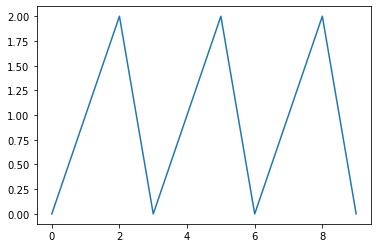

In [109]:
x, y = zip(*data)
plt.plot(x, y)
plt.show()

In a similar way, the <code>zip()</code> function is often used to prepare sets of parameters to be fed into a function in a multiprocessing context, as shown in a simplified example below to compute the distance between a list of origins and another list of corresponding destinations.

The code also demonstrate the formatting of output with an <code>f</code> string.
  - Curly braces <code>{}</code> indicate where to insert variable values in the string
  - Floating-point values can be formatted as indicated with the expression after the colon

In [2]:
def dist(p, q):
    import math
    return math.sqrt(sum([abs(p[i] - q[i])**2 for i in range(len(p))]))

In [4]:
origin = [[0,0], [1,5], [4,2], [8,1]]
dest = [[9,5], [1,7], [0,5], [6,2]]

arg = zip(origin, dest)

for a in arg:
    print(f'The distance between {a[0]} and {a[1]} is {dist(*a):.2f}')

The distance between [0, 0] and [9, 5] is 10.30
The distance between [1, 5] and [1, 7] is 2.00
The distance between [4, 2] and [0, 5] is 5.00
The distance between [8, 1] and [6, 2] is 2.24


Note that if the two data structures being zipped do not ahve the same number of elements, then the number of elements being zipped equals the number of elements in the smaller variable.

In [3]:
origin = [[0,0], [1,5], [4,2], [8,1]]
dest = [[9,5], [1,7], [0,5]]

arg = zip(origin, dest)

for a in arg:
    print(f'The distance between {a[0]} and {a[1]} is {dist(*a):.2f}')

The distance between [0, 0] and [9, 5] is 10.30
The distance between [1, 5] and [1, 7] is 2.00
The distance between [4, 2] and [0, 5] is 5.00


## <code>map()</code> Function <a name='map' />  
Back to <a href = '#navigation'>Navigation</a>

The <code>map()</code> function takes as its first argument a function and an iterable data type as its second element (e.g., list, tuple).  It applies the function sequentially to each of the elements of the iterable data.

The result is a <code>map</code> data type, which is an iterator, as was the case with the <code>zip()</code> function.

The applied functions are often <code>lambda</code> functions although custom function and built-in functions can be applied also.

In [112]:
result = map(lambda x:x**2, range(4))
type(result)

map

In [113]:
result = map(lambda x:x**2, range(4))
result

In [114]:
result = map(lambda x:x**2, range(4))
for r in result:
    print(r)

0
1
4
9


In [115]:
result = map(lambda x:x**2, range(4))
[*result]

[0, 1, 4, 9]

In [288]:
result = map(lambda x:x**2, range(4))
list(result)

[0, 1, 4, 9]

In [116]:
result = map(lambda x:x**2, range(4))
[r for r in result]

[0, 1, 4, 9]

In [120]:
data = ['1', '3', '5', '6', '8']
data = map(int, data)
data = [*data]
print(data)
print(type(data[0]))

[1, 3, 5, 6, 8]
<class 'int'>


Other <code>map()</code> examples with...

- Custom functions
- <code>sum</code>
- <code>len()</code> function
- <code>min()</code> and <code>max()</code> functions

In [91]:
def sq(x):
    return x**2

[*map(sq, range(5))]

[0, 1, 4, 9, 16]

In [90]:
data = [[0,1,2,3], [4,5,6,7], [8,9,10,11]]
result = map(sum, data)
for r in result:
    print(r)

6
22
38


In [292]:
import random

my_list = [[random.random() for _ in range(random.randint(1,6))] for _ in range(5)]

[*map(len, my_list)]

[5, 5, 5, 5, 2]

In [293]:
[*map(min, my_list)]

[0.004610587216948847,
 0.07922660906000856,
 0.2300322285908757,
 0.46871349869564816,
 0.11612568347279228]

In [295]:
[*map(max, my_list)]

[0.8107720972285645,
 0.4706235969932422,
 0.7763621621379957,
 0.9984155631796284,
 0.20793792824718915]

## <code>filter()</code> Function  <a name='filter' />  
Back to <a href = '#navigation'>Navigation</a>

The filter function takes a function as its first argument and a iterable data type as its second argument.  The function is applied to each element of the iterable argument and its output is interpreted as <code>True</code> or <code>False</code>, and it returns only those elements of the iterable argument where the function result is <code>True</code>.

Similar to <code>zip()</code> and <code>map()</code>, <code>filter()</code> returns an iterator whose values must be unpacked in order to view them.  The iterator can be used directly in a <code>for</code> loop or list comprehension.

In [121]:
filter(lambda x: x%2 == 0, range(10))

In [122]:
result = filter(lambda x: x%2 == 0, range(10))
[*result]

[0, 2, 4, 6, 8]

In [92]:
result_explain = map(lambda x: x%2 == 0, range(10))
[*result_explain]

[True, False, True, False, True, False, True, False, True, False]

In [123]:
import random

def big(x):
    return x >= 0.5

data = [random.random() for _ in range(20)]
result = filter(big, data)
[*result]

[0.830120419312502,
 0.9474745801638256,
 0.7739877054352448,
 0.6600470314311495,
 0.9693698561634513,
 0.5395149121508982,
 0.7245959041718371,
 0.7881975877202262]

In [124]:
data = [random.random() for _ in range(20)]
result = filter(big, data)

while True:
    print(next(result))

0.6771310133661214
0.6152254956387349
0.566736619260989
0.860003272366115
0.8351282697786196
0.8614013427035372
0.6220801257139444
0.9823913189772012
0.7388358238082972
0.6059935842234422
0.6328798703550202
0.9369722058971219
0.5945543946499621


StopIteration: 

## Applications of <code>zip()</code>,  <code>map()</code>,  and <code>filter()</code> Functions  <a name='apps_zip_map_filter' />  
Back to <a href = '#navigation'>Navigation</a>

We will use these functions throughout this notebook where they are useful.

For now, here are some exercises for absorbing how these functions work.

### <code>zip()</code> Exercise

Suppose you wanted to plot the data below with <code>matplotlib</code>.  Apply the <code>zip()</code> function to reorganize the data into two series, one for the <code>x</code>-axis and one for the <code>y</code>-axis.  you may need to use the <code>*</code> operator as well.

In [27]:
data = [[0,0], [1,2], [2,4], [3,6]]


Using the <code>*</code> operator for reorganizing data series.

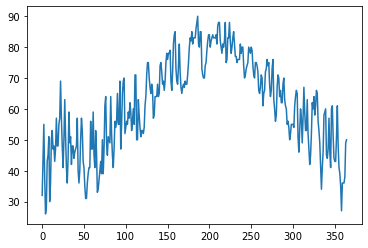

In [23]:
with open('files/NorfolkWeather1999.csv','r') as f:
    nw1999 = f.readlines()

for i in range(len(nw1999)):
    nw1999[i] = nw1999[i].strip()
    nw1999[i] = nw1999[i].split(',')
    nw1999[i][0] = int(nw1999[i][0])
    nw1999[i][1] = float(nw1999[i][1])

x, y = zip(*nw1999)
plt.plot(x, y, label = '1999')
plt.show()

Or, even better, let's use <code>zip()</code>.  Notice how much more readable the code is, providing you are familiar with <code>zip()</code>.

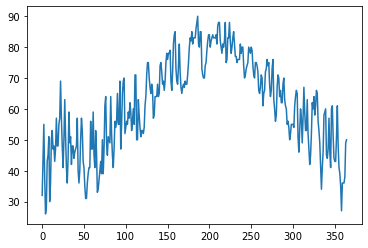

In [299]:
with open('files/NorfolkWeather1999.csv','r') as f:
    nw1999 = f.readlines()
convert_map = {0:int, 1:float}
nw1999 = ssc_2d_map(convert_map, nw1999)

''' Create x and y series data '''
x, y1999 = zip(*nw1999)
    
plt.plot(x, y1999, label = '1999')
plt.show()

### <code>map()</code> Exercise

Write a function to return the strings <code>odd</code> or <code>even</code> depending on the value of an integer passed to it.  Then, use the <code>map()</code> function to apply that function to the list names <code>values</code>.

In [29]:
values = [0, 2, 4, 6, 8, 1, 3, 5, 7, 9]



even
even
even
even
even
odd
odd
odd
odd
odd
['even', 'even', 'even', 'even', 'even', 'odd', 'odd', 'odd', 'odd', 'odd']


### <code>filter()</code> Exercise

Use the <code>filter()</code> function to filter out the elements less than 5 from the list <code>values</code>.

In [ ]:
values = [0, 2, 4, 6, 8, 1, 3, 5, 7, 9]

# Text File Input with Base Python Generators <a name='text_w_gen' />  
Back to <a href = '#navigation'>Navigation</a>

Why read files with a generator?

__Large files can be read faster by generators while using less memory for holding the entire file contents at once as is done with base Python statements__

We will demonstrate the speed advantage in the subsequent code cells using a longer version of the Norfolk weather file, which is 1M lines long: <code>files/NorfolkWeatherLong.csv</code>.  Each line has an integer day index and a floating point temperature. 

<code>%%timeit</code> is a function that is built in to jupyter.  It times the execution of the entire cell into which it is placed.

## Typical Base Python Method

... which takes approximately 1 second to read a large code file.

In [269]:
%%timeit 

def ssc_2d(file_name):
    with open(file_name,'r') as f:
        data = [line.strip().split(',') for line in f.readlines()]
        data = [[int(point[0]), float(point[1])] for point in data]
        return data

filename = 'files/NorfolkWeatherLong.csv'
nw1999 = ssc_2d(filename)

982 ms ± 7.08 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Large File Input with Base Python Generators

The code in the cell below returns a generator that provides access to the text file data.

It is almost 10X faster than using list comprehension.

In [270]:
%%timeit

def ssc_2d(filename):
    with open(filename,'r') as f:
        data = (line.strip().split(',') for line in f.readlines())
        data = ((int(point[0]), float(point[1])) for point in data)
    return data

x = ssc_2d('files/NorfolkWeatherLong.csv')

101 ms ± 599 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


We still haven't demonstrated how to use generators to minimize memory usage, but we will do that shortly.

Also, these execution times are only for the reading of the data.  We must also consider the ultimate task for which we are inputting the data and the total effect on execution time of using generators.  It is possible to use methods for subsequent plotting or computation that squander the speed gain demonstrated above.    Nonetheless, these quick demonstrations hint at the power and value of generators.

Let's consider one use case where we want to plot the first 365 lines of <code>NorfolkWeatherLong.csv</code> (the first year), and let's compare the speed of base Python versus generators.  As previously mentioned, <code>matplotlib</code> will not plot generators, so we need to present it was a list (<code>numpy</code> arrays and <code>pandas</code> series work as well).

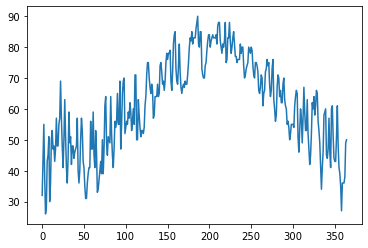

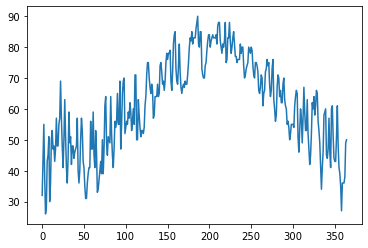

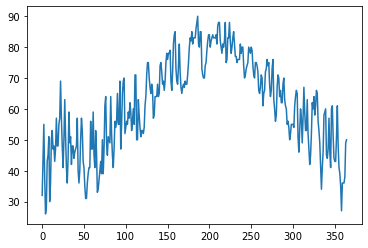

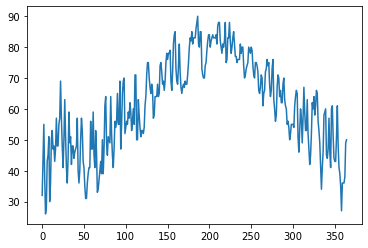

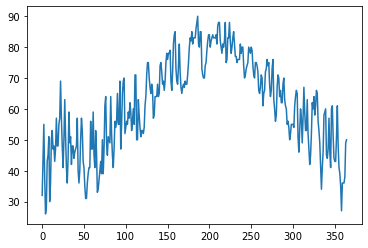

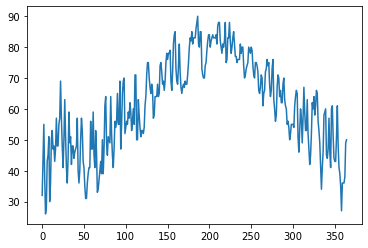

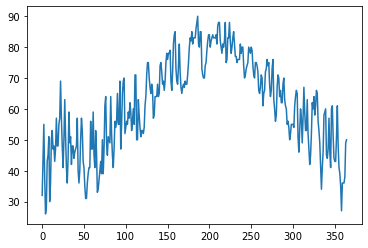

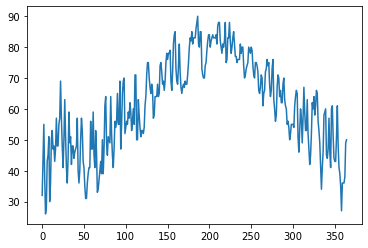

1.21 s ± 22.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [271]:
%%timeit

def ssc_2d(data):
    x = []
    y = []
    for i in range(len(data)):
        data[i] = data[i].strip().split(',')
        x.append(int(data[i][0]))
        y.append(float(data[i][1]))
    return x, y

with open('files/NorfolkWeatherLong.csv','r') as f:
    nw1999 = f.readlines()
x, y = ssc_2d(nw1999)

plt.plot(x[:365],y[:365])
plt.show()

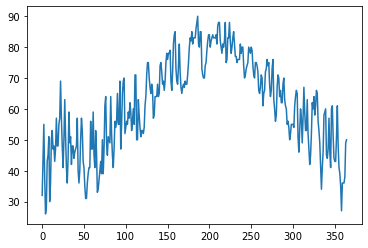

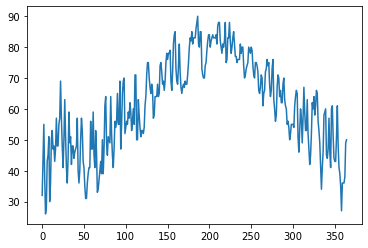

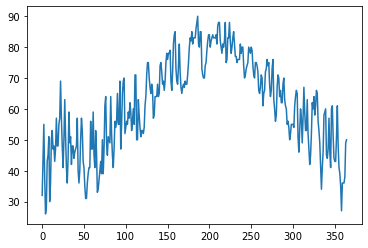

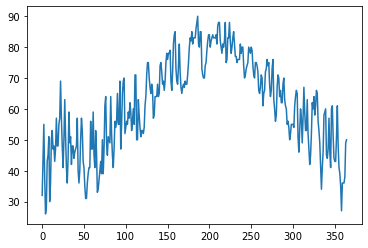

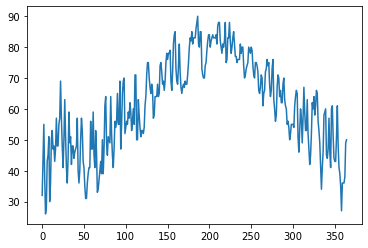

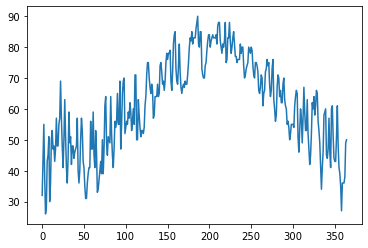

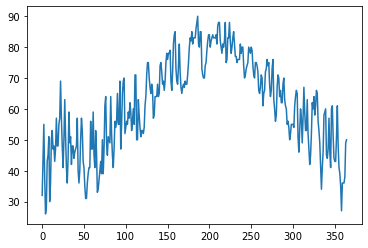

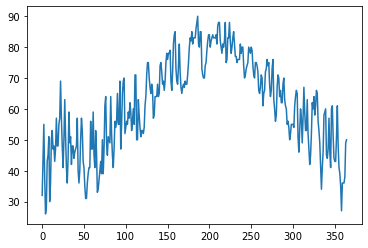

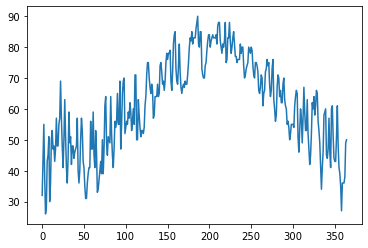

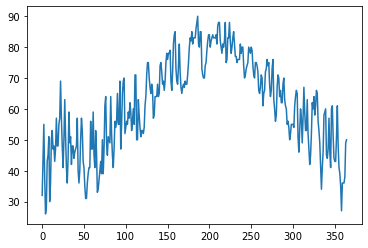

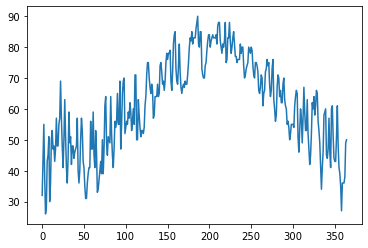

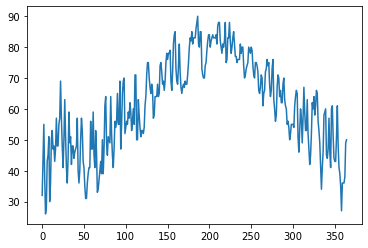

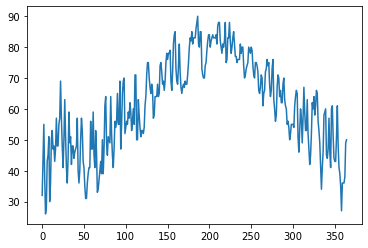

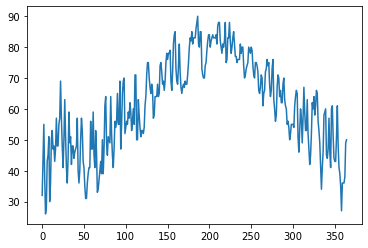

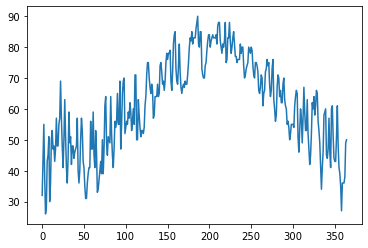

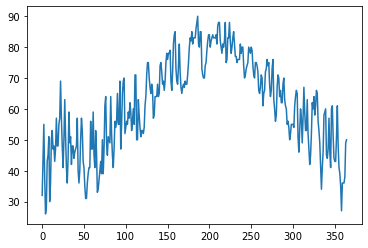

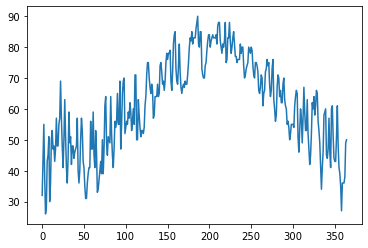

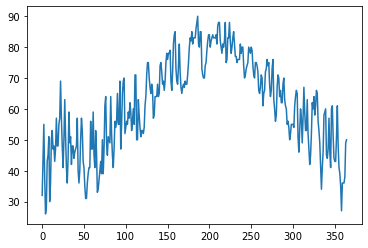

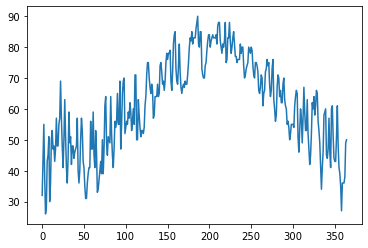

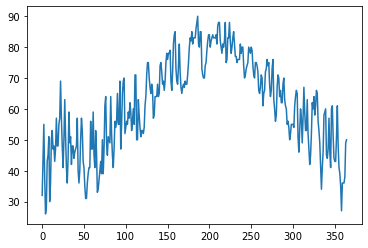

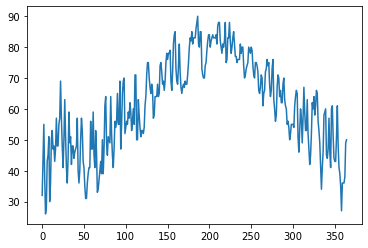

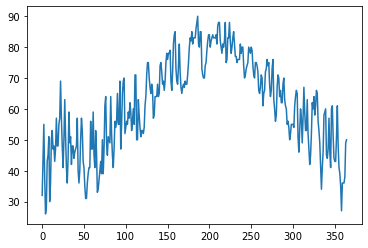

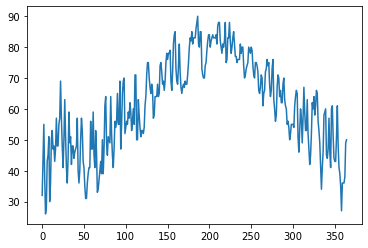

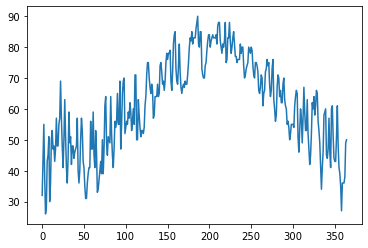

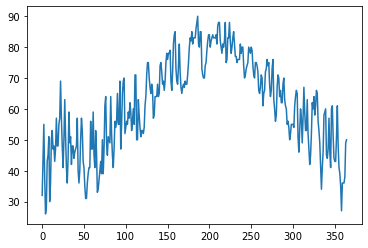

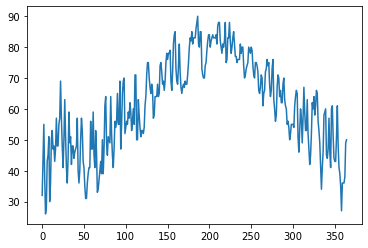

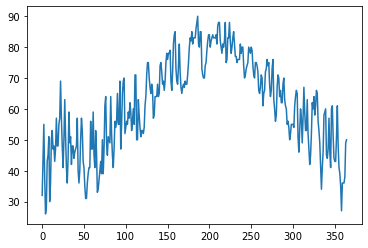

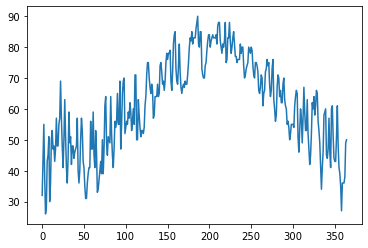

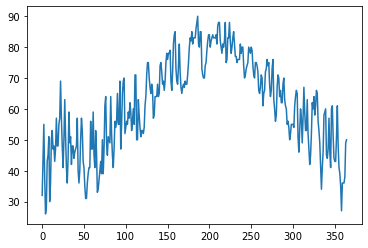

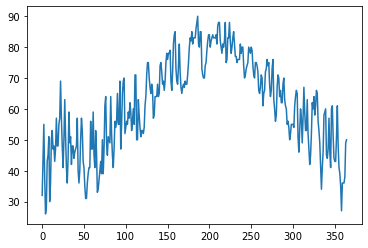

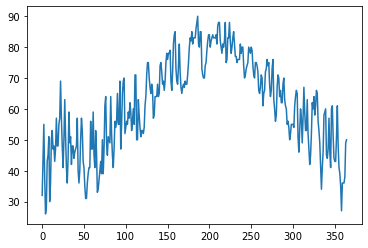

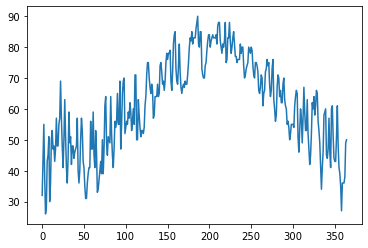

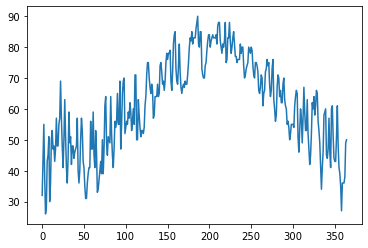

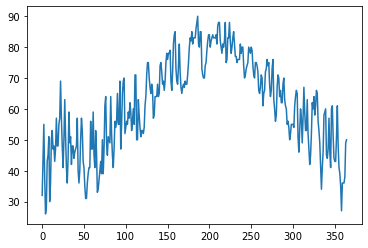

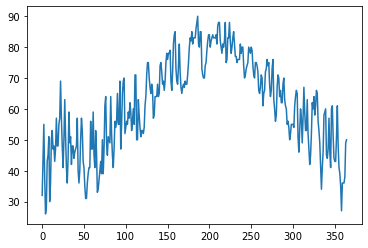

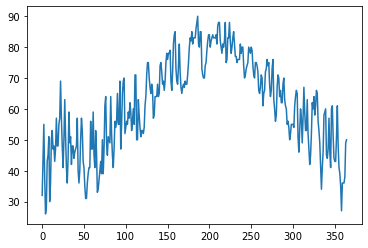

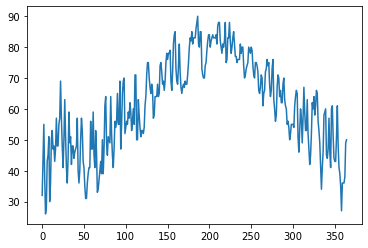

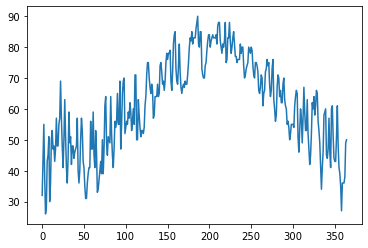

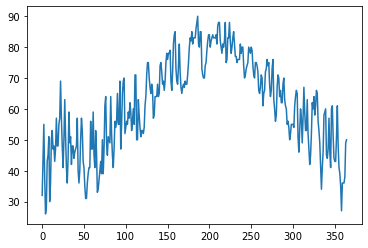

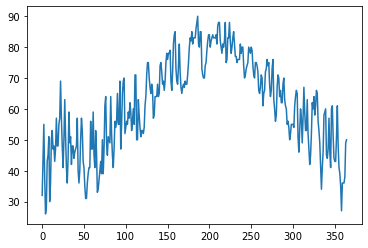

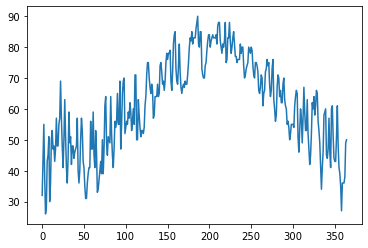

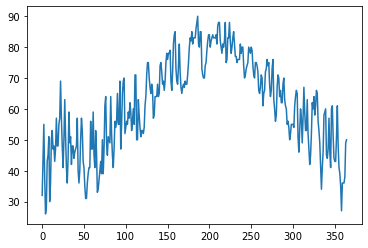

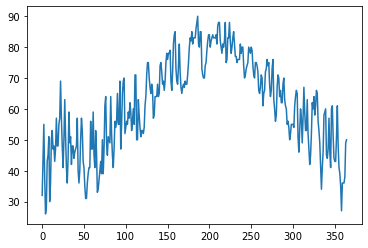

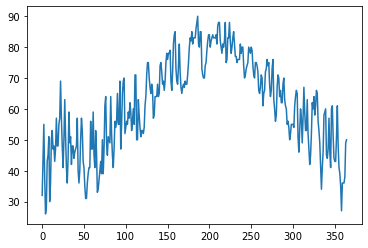

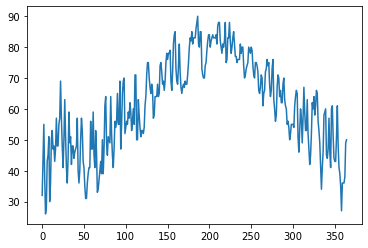

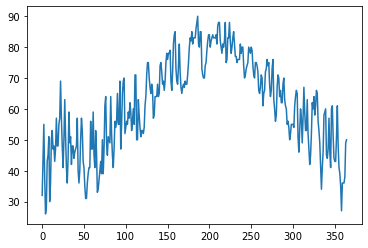

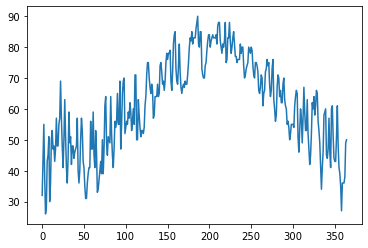

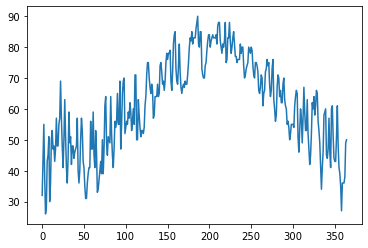

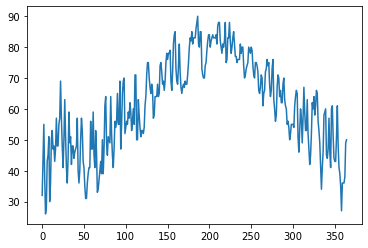

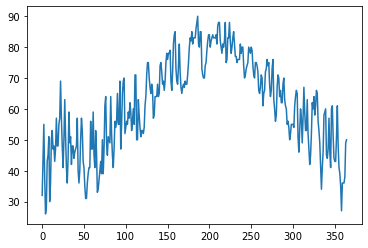

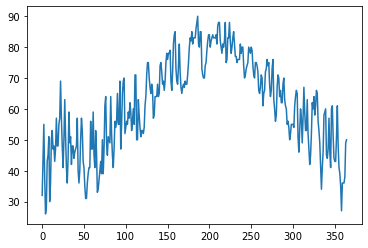

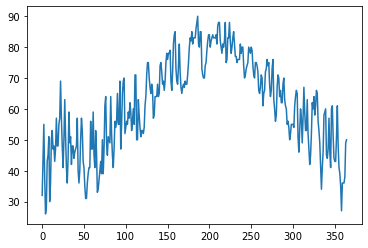

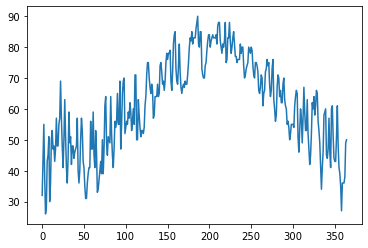

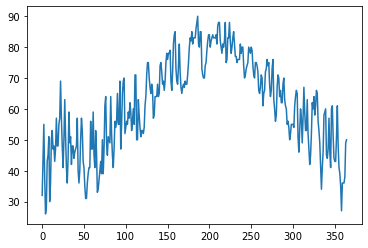

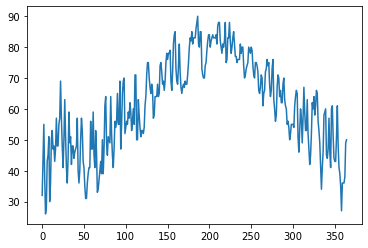

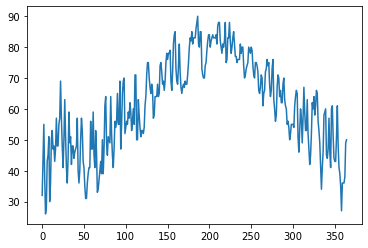

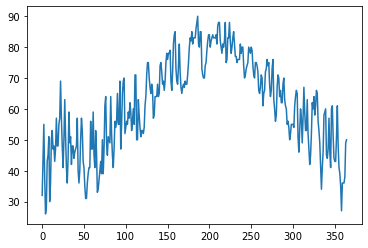

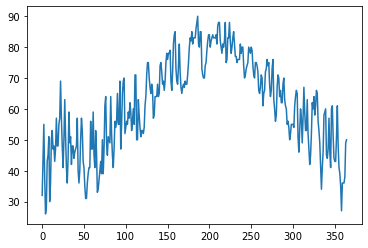

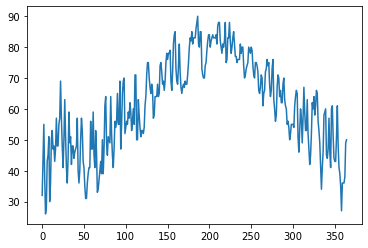

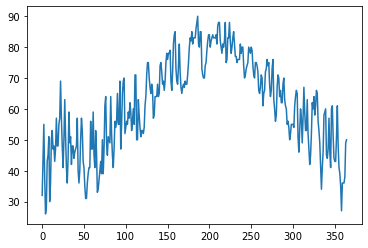

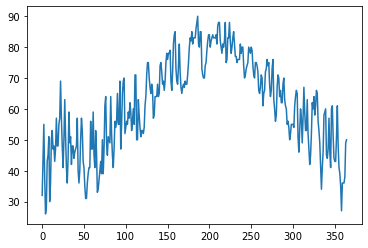

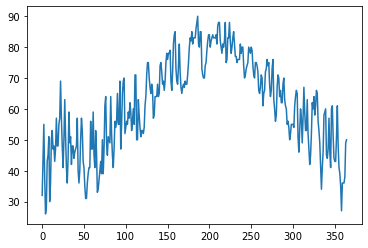

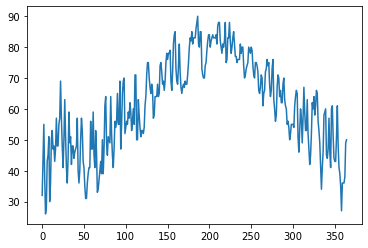

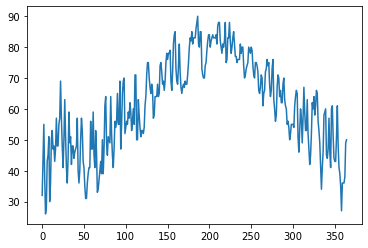

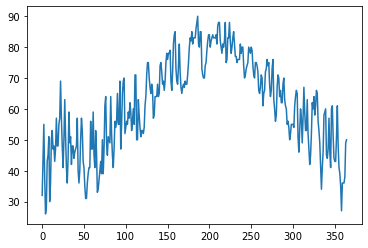

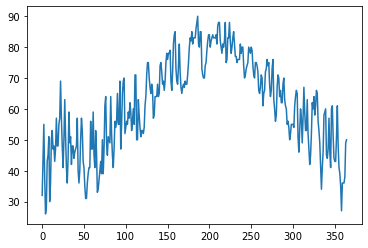

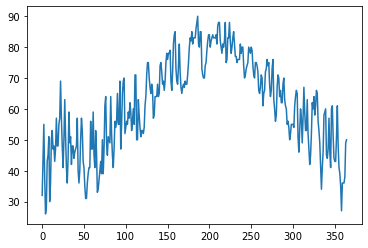

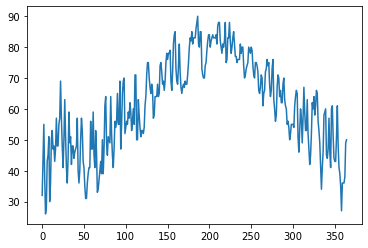

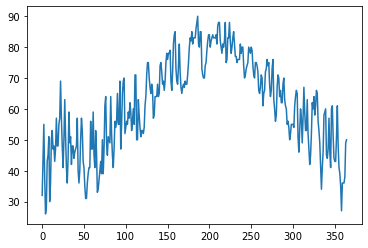

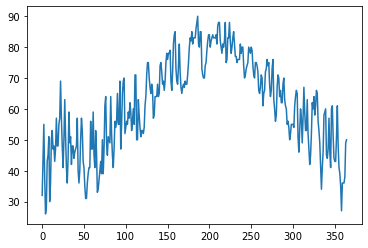

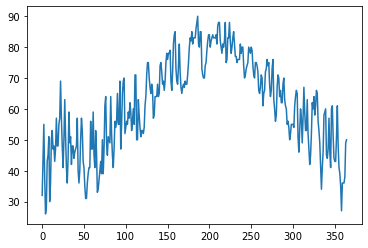

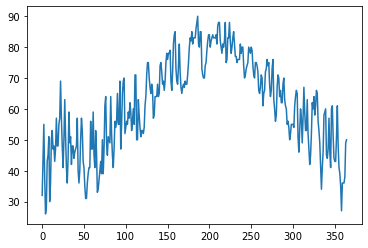

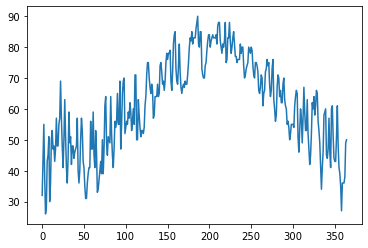

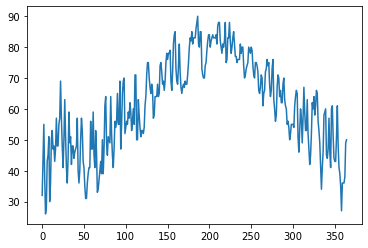

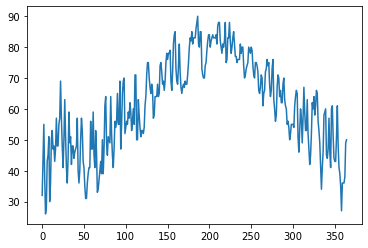

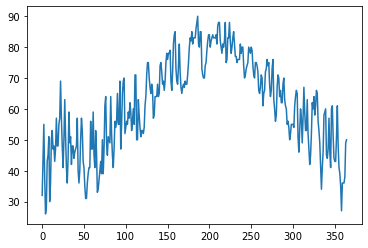

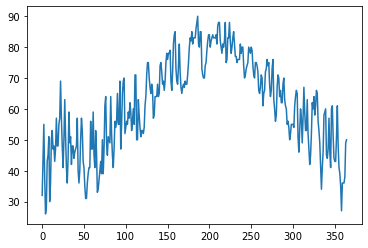

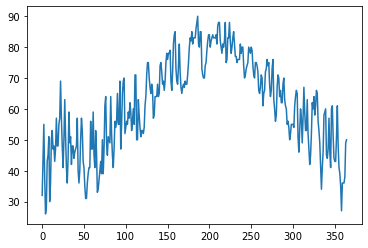

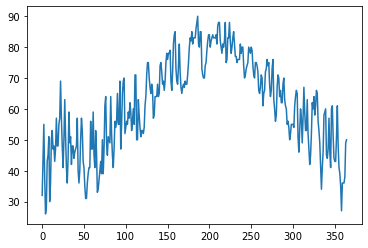

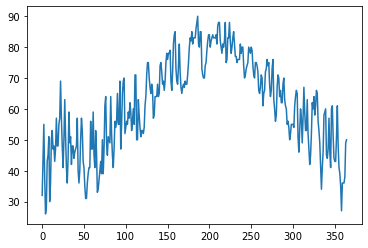

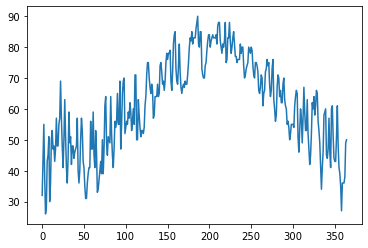

202 ms ± 3.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [272]:
%%timeit

from itertools import islice

def ssc_2d(filename):
    with open(filename,'r') as f:
        data = (line.strip().split(',') for line in f.readlines())
        data = ((int(point[0]), float(point[1])) for point in data)
    return data

x = ssc_2d('files/NorfolkWeatherLong.csv')

plt.plot(*zip(*islice(x, 0, 365)))
plt.show()

Generators provide access text file data and plot it __6X__ faster!

What do <code>\*zip()</code> and <code>\*islice()</code> do?
- <code>*zip()</code> separates the $x$ and $y$ data, which the <code>ssc_2d()</code> returns as tuples for each data point.
- <code>islice()</code> is the slice operator for generators akin the the <code>my_list[start:stop:step]</code> statement for lists.  Here, <code>islice()</code> selects the first 365 data points.  This is much faster than transforming the entire generator to a list and then slicing.  The accompanying <code>*</code> removes the outer container of the data so <code>zip()</code> can reformat the 'loose' sublists of two elements each.

Multiple graphs are displayed because <code>%%timeit</code> executes the code multiple times as it profiles its execution time.

In [117]:
from itertools import islice

def ssc_2d(filename):
    with open(filename,'r') as f:
        data = (line.strip().split(',') for line in f.readlines())
        data = ((int(point[0]), float(point[1])) for point in data)
    return data

x = ssc_2d('files/NorfolkWeatherLong.csv')

print([*islice(x, 0, 25)], '\n\n')
print([*zip(*islice(x, 0, 25))])

[(0, 32.0), (1, 43.0), (2, 55.0), (3, 38.0), (4, 26.0), (5, 28.0), (6, 43.0), (7, 45.0), (8, 51.0), (9, 30.0), (10, 36.0), (11, 50.0), (12, 53.0), (13, 47.0), (14, 48.0), (15, 43.0), (16, 47.0), (17, 57.0), (18, 48.0), (19, 48.0), (20, 55.0), (21, 57.0), (22, 69.0), (23, 57.0), (24, 48.0)] 


[(25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49), (41.0, 50.0, 63.0, 51.0, 41.0, 36.0, 44.0, 59.0, 49.0, 51.0, 42.0, 48.0, 48.0, 44.0, 46.0, 47.0, 48.0, 57.0, 40.0, 36.0, 40.0, 50.0, 57.0, 53.0, 43.0)]


# Computations on Large Text Files with Generators <a name='comp_w_gen' />  
Back to <a href = '#navigation'>Navigation</a>

Generators provide a subtantial speed advantage and, actually, a feasibility advantage over base Python methods with extremely large data files are concerned.  This is particularly the case when an entire data set cannot be held in memory.  Generators, in this context, can quickly read the data in chunks, thus avoiding the problem of overloading computer memory if all the data were to be loaded at once.  The complication that sometimes arises is that computation methods need to be designed that work with reading the data in chunks and, if a one-pass comptuation is desired, a way to avoid having summary statistics determined by the entire data set, such as the mean.

## Moving Average Computation<a name='mv_avg' />  
Back to <a href = '#navigation'>Navigation</a>

To compute moving averages with streamed data, we need to amend the approach above where only one value was read at a time.  With an $n$-period moving average, we need to keep track of $n$ numbers at a time while maintaining a moving window with those values in an efficient manner.  We need to consider what are the best data types to:
- Quickly update the moving window data as we stream the data
- Quickly compute the mean

There is not necessarily one data type that will be best for both, so we will need to investigate.  Two possibilities are:
- <code>numpy</code> arrays
  - These have built-in methods for computing means, which are fast
- Python lists
  - Might be fast for this application if used properly (avoiding <code>append</code>, but need to compute mean using <code>sum()</code> function, which might be slower then <code>numpy</code>.
  - In the code below, a scheme is used where the oldest data element in an $n$-element list is overwritten with the newest element, before taking the average.
  
Let's use a larger set of 1999 Norfolk weather data: <code>files/NorfolkWeatherLong.csv</code>.

The three code sets below represent these approaches:

- Using basic Python without list comprehension
- Using basic Python with list comprehension
- Using <code>numpy</code> 
- Using a Python generator function

A version of the function <code>ssc_2d_map()</code> is repeated for convenience below, which extracts the temperature data only.

In [84]:
def ssc_2d_map(file, convert):
    with open(file, 'r') as f:
        data = f.readlines()
    
    for i in range(len(data)):
        data[i] = data[i].strip().split(',')
        for j, mk_type in convert.items():
            data[i][j] = mk_type(data[i][j])
    return [x[1] for x in data]

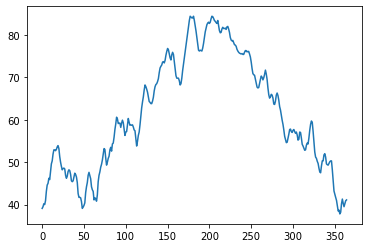

Execution time:  2.45 seconds


In [86]:
import time
import matplotlib.pyplot as plt

period = 10
filepath = 'files/NorfolkWeatherLong.csv'
convert_map = {0:int, 1:float}

start = time.time()

data = ssc_2d_map(filepath, convert_map)
ma = []  # Initialize moving average

for i in range(0, len(data) - period + 1):
    ma.append(sum(data[i:i + period])/period)

plt.plot(ma[:365])
plt.show()

print(f'Execution time: {float(time.time() - start): .2f} seconds')

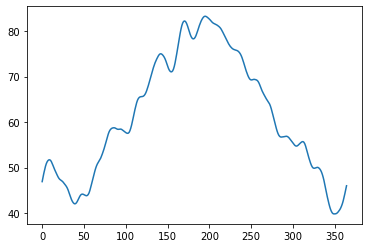

Execution time:  2.49 seconds


In [88]:
import time
import matplotlib.pyplot as plt

period = 10
filepath = 'files/NorfolkWeatherLong.csv'

start = time.time()

data = ssc_2d_map(filepath, convert_map)
ma = [sum(ma[i:i + period])/period for i in range(0,len(ma) - period + 1)]

plt.plot(ma[:365])
plt.show()

print(f'Execution time: {float(time.time() - start): .2f} seconds')

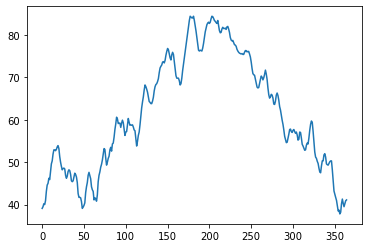

Execution time:  9.22 seconds


In [141]:
import numpy as np
import time
import matplotlib.pyplot as plt

def read_a_line(filename):
    with open(filename,'r') as f:
        for line in f:
            yield float(line.strip().split(',')[1])

start = time.time()
window = 10
filepath = 'files/NorfolkWeatherLong.csv'
read_temp = read_a_line(filepath)
mv_avg = []

''' Create variable for moving window '''
mv_win = np.zeros((window,), dtype=np.float32)

''' Fill window with initial data '''
for i in range(window - 1):
    mv_win[i] = next(read_temp)
    
for temp in read_temp:
    i += 1
    mv_win[i%window] = temp
    mv_avg.append(np.mean(mv_win))

plt.plot(mv_avg[:365])
plt.show()

print(f'Execution time: {float(time.time() - start): .2f} seconds')

With a Python generator.

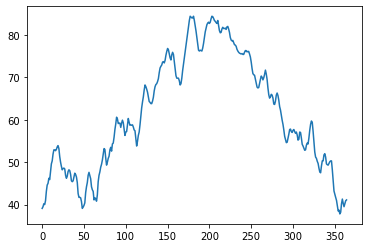

Execution time:  1.23 seconds


In [143]:
import time
import matplotlib.pyplot as plt

def read_a_line(filename):
    with open(filename,'r') as f:
        for line in f:
            yield float(line.strip().split(',')[1])

start = time.time()
window = 10
filepath = 'files/NorfolkWeatherLong.csv'
read_temp = read_a_line(filepath)
mv_avg = []

''' Create variable for moving window '''
mv_win = [0 for i in range(window)]

''' Fill window with initial data '''
for i in range(window - 1):
    mv_win[i] = next(read_temp)
    
for temp in read_temp:
    i += 1
    mv_win[i%window] = temp
    mv_avg.append(sum(mv_win)/window)

plt.plot(mv_avg[:365])
plt.show()

print(f'Execution time: {float(time.time() - start): .2f} seconds')

The downsides and weaknesses of generators are due to entire file contents not being held in memory at any one time:
- Any processing/computations of the file contents must be done in chunks
- Any portion of the input data that will be plotted in <code>matplotlib</code> must be in a list or similar data struture.
  - <code>matplotlib</code> does not take generators

This code reads one line at a time, although the best performing generators read files in larger _chunks_.

We could optimize inputting a text file using the base Python <code>open()</code> statement by finding the best _chunk size_ (number of lines) to read in each iteration, which I have done in the code cells below.  But, the <code>pandas</code> package permits us to read files in _chunks_ and permits us to create a generator to do so, as we demonstrate in the next section.

## NYC Taxi Data <a name='nyc' />  
Back to <a href = '#navigation'>Navigation</a>

Let's start investigating generators with a somewhat large data set on New York City Taxis.

[NYC Taxi Cab Data](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/data)

This data is about 5.5GB, so it is unlikely to crash your computer, but loading it all into RAM, or attempting to, could be very slow and cause your computer to continually swap data between the hard drive and memory, which is very slow.  

We will investigate several methods for loading the data and computing a frequency histogram for the number of passengers while paying attention to speed and memory consumption.
- Basic Python: reading all of the data at once.
- Basic Python with a generator
- Basic Python with a generator function
- <code>pandas</code>

Please note these methods in the cells that follow:
- The 'f' string used to format the output.
- The <code>dict.get()</code> statement, which allows a default value to be assigned to a new key if it doesn't already exist in the dictionary.  The effect of <code>fh.get(num_pass, 0)</code> is that is creates a new dictionary element with a key of <code>num_pass</code> if that key doesn't exist and assigns a corrseponding value of zero.  If the key exists, then this statement simply gets the value associates with the key <code>num_pass</code>.
- The so-called walrus operator (:=), which permits an assignment statement within a loop declarion or conditional statement
- The generator also strips whitespace from the ends of the line of text, including <code>\n</code>, while splitting it at the commas. 
- The generator conveniently takes a filename and opens the file within the function rather than needs a filestream passed to it.

Basic Python reading the entire file at one time

In [85]:
import time

start = time.time()
file_name = 'files/new-york-city-taxi-fare-prediction/train.csv'
#read_gen = read_one_line(file_name, skip_first=True)
fh = {}

with open(file_name, 'r') as f:
    _ = f.readline()  # Skips header line
    data = f.readlines()

for pt in data:
    pt = pt.strip().split(',')
    pt = int(pt[7])
    fh[pt] = fh.get(pt, 0) + 1
        
print(fh)
print(f'Execution time: {float(time.time() - start): .2f} seconds')

{1: 38337524, 2: 8175243, 3: 2432712, 6: 1174647, 5: 3929346, 4: 1178852, 0: 195416, 208: 64, 9: 23, 129: 2, 7: 15, 51: 1, 49: 1, 8: 9, 34: 1}
Execution time:  61.95 seconds


A filestream is actually a generator and so we can use it to read one line at a time, thus reducing memory usage significantly: we never consume more memory than is needed to for one line from the text file.

In [62]:
import time

start = time.time()
file_name = 'files/new-york-city-taxi-fare-prediction/train.csv'
#read_gen = read_one_line(file_name, skip_first=True)
fh = {}

with open(file_name, 'r') as f:
    _ = f.readline()  # Skips header line
    while (num_pass := f.readline()) != '':
        num_pass = num_pass.strip().split(',')
        num_pass = int(num_pass[7])
        fh[num_pass] = fh.get(num_pass, 0) + 1
        
print(fh)
print(f'Execution time: {float(time.time() - start): .2f} seconds')

{1: 38337524, 2: 8175243, 3: 2432712, 6: 1174647, 5: 3929346, 4: 1178852, 0: 195416, 208: 64, 9: 23, 129: 2, 7: 15, 51: 1, 49: 1, 8: 9, 34: 1}
Execution time:  64.37 seconds


Here's the generator function for the second approach, with the <code>read_one_line</code> function: it uses a <code>yield</code> statement rather than <code>return</code> and so it is a generator function. 

In [55]:
def read_one_line(filename, skip_first=True):
    with open(filename, 'r') as f:
        if skip_first:
            x = f.readline()
        while (x := f.readline()) != '':
            yield x.strip().split(',')

In [57]:
import time

start = time.time()
file_name = 'files/new-york-city-taxi-fare-prediction/train.csv'
read_gen = read_one_line(file_name, skip_first=True)
fh = {}

for line in read_gen:
    num_pass = int(line[7])
    fh[num_pass] = fh.get(num_pass, 0) + 1
        
print(fh)
print(f'Execution time: {float(time.time() - start): .2f} seconds')

{1: 38337524, 2: 8175243, 3: 2432712, 6: 1174647, 5: 3929346, 4: 1178852, 0: 195416, 208: 64, 9: 23, 129: 2, 7: 15, 51: 1, 49: 1, 8: 9, 34: 1}
Execution time:  67.94 seconds


The following cells show an example of how you might try to speed up data input by reading multiple lines with each function call.  The code becomes a bit more complex and, in this case, does not provide much advantage.

In [35]:
from itertools import islice
    
def read_chunks(filepath, chunksize, skip_first):
    with open(filepath, 'r') as f:
        if skip_first:
            _ = f.readline()
        while True:
            lines = islice(f, chunksize)
            if a:=[*lines]:
                yield (x.strip().split(',') for x in a)
            else:
                break
            
            #yield (next(f, '').strip().split(',') for _ in range(chunksize))
            

In [39]:
import time

start = time.time()
file_name = 'files/new-york-city-taxi-fare-prediction/train.csv'
read_gen = read_chunks(file_name, 10000, skip_first=True)
fh = {}

for chunk in read_gen:
    for line in chunk:
        num_pass = int(line[7])
        fh[num_pass] = fh.get(num_pass, 0) + 1
        
print(fh)
print(f'Execution time: {float(time.time() - start): .2f} seconds')

{1: 38337524, 2: 8175243, 3: 2432712, 6: 1174647, 5: 3929346, 4: 1178852, 0: 195416, 208: 64, 9: 23, 129: 2, 7: 15, 51: 1, 49: 1, 8: 9, 34: 1}
Execution time:  62.50 seconds


The <code>pandas</code> package also provides a method for reading data in chunks.  This requires that we combine the results from multiple <code>value_counts()</code> operations, which create frequency histograms.  In this circumstance, <code>pandas</code> does not speed up the operation, as indicated by the graph below.  In addition, using Python to read one line at a time consumes much less memory than is required for the chunksizes required by <code>pandas</code> for reasonably fast execution.

While packages like <code>pandas</code> can provide some wonderful functionality, in some cases basic Python can be faster.

In [66]:
import pandas as pd
import time

start = time.time()

fh = pd.Series(dtype='int64')
for chunk in pd.read_csv('files/new-york-city-taxi-fare-prediction/train.csv', chunksize=2000000):
    fh = fh.add(chunk['passenger_count'].value_counts(), fill_value=0)
print(fh)
print(f'Execution time: {float(time.time() - start): .2f} seconds')

0        195416.0
1      38337524.0
2       8175243.0
3       2432712.0
4       1178852.0
5       3929346.0
6       1174647.0
7            15.0
8             9.0
9            23.0
34            1.0
49            1.0
51            1.0
129           2.0
208          64.0
dtype: float64
Execution time:  63.15 seconds


Graph of <code>pandas</code> execution time versus chunksize.

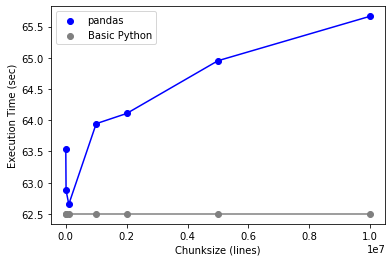

In [84]:
import matplotlib.pyplot as plt

p_time = {1000: 63.54459285736084,
 10000: 62.875988245010376,
 100000: 62.655011892318726,
 1000000: 63.9449999332428,
 2000000: 64.10800004005432,
 5000000: 64.95298767089844,
 10000000: 65.6650767326355}

fig,ax = plt.subplots()
x = [x for x in p_time.keys()]
y = [y for y in p_time.values()]
y2 = [62.5 for _ in range(len(x))]
ax.scatter(x, y, c='b', label='pandas')
ax.scatter(x, y2, c='gray', label='Basic Python')
for i in range(len(p_time.keys())-1):
    ax.plot(x[i:i+2], y[i:i+2], c='b')
    ax.plot(x[i:i+2], y2[i:i+2], c='gray')
ax.set_ylabel('Execution Time (sec)')
ax.set_xlabel('Chunksize (lines)')
ax.legend()
plt.show()

__Best Approach?:__ the best approach here is arguably to use the filestream generator directly in your code (or use a function) to access one line at a time.  It is close to the fastest approach and minimizes memory consumption.

## One-pass versus Two-pass Computations <a name='1_2_pass' />  
Back to <a href = '#navigation'>Navigation</a>

Suppose we are interested in computing the standard deviation of the number of riders.  Having already computed the frequency histogram data we could compute the standard deviation directly.  But, this is not possible if our data were floating-point and we needed to construct _bins_, in which case computing standard deviation from the frequency data would be only an approximation. 

This formula is typically used to compute the variance (from which we compute standard deviation) of a series of $n$ values:

$ \sum_{i=0}^{n-1}{\left( x_i - \bar{x} \right)^2}$.

This computation requires that we know the mean of $x$, $\bar{x}$ prior to summing the squared differences.  When the data is in a list (in memory), this is easy as shown in the next cell for a range of integers.

In [120]:
import random

n = 10
x = [i for i in range(n)]
x_bar = sum(x) / n
x_var = sum([(z - x_bar)**2 for z in x])/n
print(f'Variance: {x_var: .2f}')

Variance:  8.25


Using a generator, however, presents an issue because computing the <code>sum()</code> of generator in the code cell below exhausts the generator and so no data remains in <code>x</code> to iterate over when computing <code>x_var</code>.  The result is a variance of 0, which is incorrect.

In [121]:
n = 10
x = (i for i in range(n))
x_bar = sum(x) / n
x_var = sum([(z - x_bar)**2 for z in x])/n
print(f'Variance: {x_var: .2f}')

Variance:  0.00


The generator needs to be reset in order to make this second computation and so using a generator makes this a _two-pass_ computation.

In [122]:
n = 10
x = (i for i in range(n))
x_bar = sum(x) / n

x = (i for i in range(n))
x_var = sum([(z - x_bar)**2 for z in x])/n
print(f'Variance: {x_var: .2f}')

Variance:  8.25


If we were to compute the variance of number of passengers in a New York City taxi in this fashion, we therefore need to instantiate the generator twice.

In [56]:
import time

start = time.time()
file_name = 'files/new-york-city-taxi-fare-prediction/train.csv'

print('Computing mean: ', end='')
num_pass_sum = 0
n = 0
read_gen = read_one_line(file_name, skip_first=True)
for line in read_gen:
    num_pass_sum += int(line[7])
    n += 1
num_pass_mean = num_pass_sum/n
print(f'{float(time.time() - start): .2f} seconds, mean = {num_pass_mean}')
      
print(f'Computing variance: ', end='')
num_pass_var = 0.0
read_gen = read_one_line(file_name, skip_first=True)
for line in read_gen:
    num_pass_var += (int(line[7]) - num_pass_mean)**2
num_pass_var = num_pass_var/n
print(f'{float(time.time() - start): .2f} seconds; Variance = {num_pass_var}')

Computing mean:  66.05 seconds, mean = 1.6853799201556816
Computing variance... 139.50 seconds; Variance = 1.7626926135457108


To confirm, compute variance from frequency data.

In [127]:
n = sum([v for k,v in fh.items()])
mean = sum([k*v for k,v in fh.items()])/n
var = sum([v/n * (k - mean)**2 for k,v in fh.items()])
print(f'n: {n}; Mean: {mean}; Variance: {var}')

n: 55423856; Mean: 1.6853799201556816; Variance: 1.7626926132991907


Using $Var[X] = {\bf E}[X^2] - {\bf E}[X]^2$ and the generator in a _one-pass_ method (although there might be some numerical stability issues with this approach sometimes).

In [130]:
import time

start = time.time()
file_name = 'files/new-york-city-taxi-fare-prediction/train.csv'

m_x = 0
m_x_sq = 0
n = 0
read_gen = read_one_line(file_name, skip_first=True)
for line in read_gen:
    d = int(line[7])
    m_x += d
    m_x_sq += d**2
    n += 1
mean = m_x/n
print(f'Execution in {float(time.time() - start): .2f} seconds; mean = {mean}; variance = {m_x_sq/n - (mean**2)}')

 76.18 seconds; mean = 1.6853799201556816; variance = 1.7626926132991914


_One-pass_ approximations to variance are possible (that are numerically stable).  Here is one.  Don't worry about the details of the computation: the main point is that variance can be approximated accurately in one-pass.  In case you do want to lok at the details, here is a reference:

[https://planetmath.org/onepassalgorithmtocomputesamplevariance](https://planetmath.org/onepassalgorithmtocomputesamplevariance)

In [ ]:
import time

start = time.time()
file_name = 'files/new-york-city-taxi-fare-prediction/train.csv'

print('Computing mean: ', end='')
num_pass_sum = 0
n = 0
read_gen = read_one_line(file_name, skip_first=True)
for line in read_gen:
    num_pass_sum += int(line[7])
    n += 1
num_pass_mean = num_pass_sum/n
print(f'{float(time.time() - start): .2f} seconds, mean = {num_pass_mean}')
      
print(f'Computing variance')
num_pass_var = 0.0
read_gen = read_one_line(file_name, skip_first=True)
for line in read_gen:
    num_pass_var += (int(line[7]) - num_pass_mean)**2
num_pass_var = num_pass_var/n
print(f'Total execution time: {float(time.time() - start): .2f} seconds; Variance = {num_pass_var}')

Lessons:
- Streaming big data is a reasonably fast and memory-efficient tactic
- Making computations with streamed data requires consideration of many approaches evaluated in terms of
  - Number of passes required
  - Numerical stability

# Citibikes Rental Data

Beyond having a business question to answer, the first step in the business analytics process cycle is to understand the data.  This data set comes from bike rental in New York City, whose website is:

[https://ride.citibikenyc.com/system-data](https://ride.citibikenyc.com/system-data)

This page describes the data fields and the data use license information can be found at:

[https://ride.citibikenyc.com/data-sharing-policy](https://ride.citibikenyc.com/data-sharing-policy)

Consistent with that agreement, monthly data files have been downloaded from 

[https://s3.amazonaws.com/tripdata/index.html](https://s3.amazonaws.com/tripdata/index.html)

and combined to create a reasonably large data file at

[https://jrbrad.people.wm.edu/data/ctba/citibikes_data.csv](https://jrbrad.people.wm.edu/data/ctba/citibikes_data.csv)

We will not discuss the data acquisition process in class, but the Python code used to acquire and combine this data is contained in the file <code>xxx</code>

Gaining a better understanding of bike rentals in Boston might include descriptive statistics on:
- Bike rental duration
- Popularity of Start/End Stations
- Frequency histogram of renters' ages or birth years
- Frequency histogram of renters' home zip codes
- Number of rentals over time
- Renters' gender distribution

xx moving average

In [63]:
with open('C:/Users/james/Downloads/201810-citibike-tripdata.csv/201810-citibike-tripdata.csv', 'r') as f:
    data = f.readlines()
data = [[z.strip('"') for z in y] for y in [x.strip().split(',') for x in data[:5]]]
# .strip('"')
print(data)

[['tripduration', 'starttime', 'stoptime', 'start station id', 'start station name', 'start station latitude', 'start station longitude', 'end station id', 'end station name', 'end station latitude', 'end station longitude', 'bikeid', 'usertype', 'birth year', 'gender'], ['330', '2018-10-01 00:00:00.7010', '2018-10-01 00:05:30.8490', '293', 'Lafayette St & E 8 St', '40.73020660529954', '-73.99102628231049', '504', '1 Ave & E 16 St', '40.73221853', '-73.98165557', '30493', 'Subscriber', '1995', '1'], ['309', '2018-10-01 00:00:13.5780', '2018-10-01 00:05:23.2310', '433', 'old - E 13 St & Avenue A', '40.72955361', '-73.98057249', '394', 'E 9 St & Avenue C', '40.72521311', '-73.97768752', '33054', 'Subscriber', '1967', '1'], ['734', '2018-10-01 00:00:16.6040', '2018-10-01 00:12:31.5050', '3472', 'W 15 St & 10 Ave', '40.742753828659026', '-74.00747358798981', '285', 'Broadway & E 14 St', '40.73454567', '-73.99074142', '33400', 'Subscriber', '1983', '2'], ['788', '2018-10-01 00:00:35.0670', 

# Measuring Execution Time and Memory Consumption  <a name='time_mem' />  
Back to <a href = '#navigation'>Navigation</a>

We will demonstrate these techniques for measuring execution time:
- Various applications of the built-in <code>timeit</code> command
- The <code>line_profiler</code> package

We will demonstrate these techniques for measuring memory usage:
- The <code>memit</code> command
- The <code>memory_profiler</code> package

The usage of these techniques varies depending on the programming context, whether it be in Jupyter, in Spyder, or on the command line.  Some do not work well in Jupyter, if at all.

__Warning:__ Ensure that the code in a cell runs correctly before using <code>%%timeit</code> to measure cell execution time.  <code>%%timeit</code> will also sometimes mute the printout.

## Execution Time  <a name='time' />  
Back to <a href = '#navigation'>Navigation</a>

First, let's take a look at:
- <code>%timeit</code> to measure execution time of one _statement_
- <code>%%timeit</code> to measure execution time of one _cell_

In [131]:
x = 2
%timeit y = x**2

146 ns ± 0.712 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [43]:
%%timeit

x = []
for i in range(1000):
    x.append(random.random())

119 µs ± 1.18 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [44]:
%%timeit

x = [random.random() for i in range(1000)]

83 µs ± 574 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


<code>%%timeit</code> does not break down execution time line-by-line, but <code>line_profiler</code> does, but it requires installation with this statemment in an Anaconda Command prompt run as an administrator:

<code>conda install -c conda-forge line_profiler</code>

Once installed, <code>line_profiler</code> is loaded into the Jupyter notebook with the statement in the following cell.

In [105]:
%load_ext line_profiler

Once loaded, two methods of using <code>line_profiler</code> are demonstrated below.

The first is this, using what is called a function decorator.  There are a couple new things in this cell, which we will describe.

Having defined a line profiler object with <code>lp = LineProfiler()</code>, the <code>lp</code> function wrapper can be applied multiple times to multiple functions and the execution times are accumulated in the reported statistics, which are obtained with the <code>lp.print_stats()</code> statement.

In [99]:
from line_profiler import LineProfiler
import numpy as np

def make_list(n):
    x = np.random.random(n)
    return x

if __name__ == '__main__':
    lp = LineProfiler()
    lp_wrapper = lp(make_list)
    lp_wrapper(100_000)
    lp.print_stats()

Timer unit: 1e-07 s

Total time: 0.0029432 s
File: <ipython-input-99-5b6d3cd6a540>
Function: make_list at line 4

Line #      Hits         Time  Per Hit   % Time  Line Contents
     4                                           def make_list(n):
     5         1      29423.0  29423.0    100.0      x = np.random.random(n)
     6         1          9.0      9.0      0.0      return x



In [102]:
from line_profiler import LineProfiler
import numpy as np

def make_list(n):
    x = np.random.random(n)
    return x

def make_list2(n):
    x = np.random.random(n)
    return x

if __name__ == '__main__':
    lp = LineProfiler()
    lp_wrapper = lp(make_list)
    lp_wrapper(100_000)
    lp_wrapper1 = lp(make_list2)
    lp_wrapper1(10_000)
    lp.print_stats()

Timer unit: 1e-07 s

Total time: 0.0005955 s
File: <ipython-input-102-f573771cf649>
Function: make_list at line 4

Line #      Hits         Time  Per Hit   % Time  Line Contents
     4                                           def make_list(n):
     5         1       5948.0   5948.0     99.9      x = np.random.random(n)
     6         1          7.0      7.0      0.1      return x

Total time: 9.03e-05 s
File: <ipython-input-102-f573771cf649>
Function: make_list2 at line 8

Line #      Hits         Time  Per Hit   % Time  Line Contents
     8                                           def make_list2(n):
     9         1        899.0    899.0     99.6      x = np.random.random(n)
    10         1          4.0      4.0      0.4      return x



The second method requires that a function be defined and then calling <code>line_profiler</code> with <code>%lprun</code>.

The output does not appear within the Jupyter notebook, but in a window that pops up at the bottom of the notebook.

In [103]:
def make_list_1(n):
    x = np.random.random(n)
    return x

In [106]:
%lprun -f make_list_1 make_list_1(100_000)

The execution time documented line by line points out the most time consuming steps, which are targets for coding improvements to reduce execution time.

## Memory Usage Profiling <a name='memory' />  
Back to <a href = '#navigation'>Navigation</a>

Measuring memory usage requires that the <code>conda install -c conda-forge memory_profiler</code> package be installed in an Anaconda command prompt run as an administrator with this command:

<code>conda install -c conda-forge memory_profiler</code>

Once installed, the <code>memory_profiler</code> package needs to be loaded into the Jupyter notebook with this command:

<code>%load_ext memory_profiler</code>

In [139]:
%load_ext memory_profiler

### <code>%%memit</code>

This gives a quick, but not detailed indication of memory usage in Jupyter.  It reports the total memory required to execute code in a cell.

It is best to delete variables used in a cell that is measured.  Otherwise, the incremental memory usage reported will reflect only the incremental increase in such variables already in use, which might be zero if you are replacing the variable with something that consumes less memory.

In [148]:
try:
    del x
except:
    pass

In [149]:
%%memit

x = []
for i in range(1_000_000):
    x.append(random.random())

peak memory: 503.87 MiB, increment: 8.09 MiB


In [156]:
try:
    del y
except:
    pass

In [157]:
%%memit

y = [random.random() for i in range(1_000_000)]

peak memory: 524.66 MiB, increment: 15.32 MiB


### <code>memory_profiler</code>

This package gives memory usage line-by-line and, therefore, provides much advantage over <code>%%memit</code> in pinpointing areas of opportunity.

<code>memory_profiler</code> must be installed with this command in an Anaconda command prompt run as an administrator:

<code>conda install -c conda-forge memory_profiler</code>

The <code>memory_profiler</code> can be run in Jupyter, although I strongly discourage that for myriad reasons including frequent results that clearly cannot be true and needing to create a <code>.py</code> code file outside of Jupyter to be analyzed.  

So, if you need to create a code file outside of Jupyter, then it makes sense to run <code>memory_profiler</code> either on the command line or in Spyder, as detailed below.

### <code>memory_profiler</code>  on the Command Line 

<code>memory_profiler</code> can analyze only code that is contained in a function.  Here is how it is applied to a function <code>make_rnd()</code> within a file <code>rnd.py</code>, which is contained in the same folder as this Jupyter notebook.

![rnd_py.jpg](images/rnd_py.jpg)

Of note in the code are these:
- The <code>profile</code> function is imported from <code>memory_profiler</code> with an alias of <code>mem_profile</code>.  (The alias is used to keep the <code>memory_profiler</code> <code>profile</code> function distinct from that same name for the <code>line_profiler</code> package.
- The 'decorator' <code>@mem_profile</code> on the <code> make_rnd()</code> function.  It is beyond the scope of this course to describe function decorators, but it suffices to understand that the decorator specifies which function is to eb profiled.

Here is the result:
![rnd_py_cmd_prmpt.jpg](images/rnd_py_cmd_prmpt.jpg)

Alternatively, one does not need to import <code>memory_profiler</code> within the code file if this command line command is used, although the default decorator <code>profile</code> must be used:
![rnd1_py.jpg](images/rnd1_py.jpg)
![rnd1_py_cmd_prmpt.jpg](images/rnd1_py_cmd_prmpt.jpg)

### <code>memory_profiler</code> in Spyder

The previously mentioned file <code>rnd.py</code> can be run directly in a Spyder environment provided that <code>memory_profiler</code> is installed in Anaconda.

![rnd_spyder.jpg](images/rnd_spyder.jpg)

# <font face='courier'>for</font> Loop Review <a name='loops' />
Back to <a href = '#navigation'>Navigation</a>

<font face='courier'>for</font> loops can be used to access the elements of _iterable_ data types, which includes:

- lists
- tuples
- dictionaries

Elements can sometimes be revised of the data type is mutable.  Lists can be freely changed, tuples cannot be changed, while dictionary values can be changed although dictionary keys cannot.  This section reviews the basics of _iterating_ through lists and dictionaries.

## Looping through Lists
Back to <a href = '#navigation'>Navigation</a>

You can access all the elements within a list using a _for_ loop.  This approach is generally called _iterating through a list_.  Lists are just one of the data types that you can iterate through: we call the collection of all such data types <font face='courier'>iterables</font>. For loops are perfect for accessing all the elements in a list because the <font face='courier'>len()</font> function cand be used to determine how many times the loop must be executed.  

There are two ways to iterate through data and objects with for loop, which are illustrated below:
- by index
- directly by referencing the items being iterated

Within a loop, we can access the value of a list element and use it in a computation or assign a new value to it.

In [ ]:
myList = [65,89,21,34,72,38,50,68,17]

We can loop through a list and access each element by using a dummy variable <font face='courier'>ele</font> (short for element), which is assigned a copy of the value of each element.  For starters, we will jsut print each element.

In [ ]:
for ele in myList:
    print(ele)

Alternatively, we can print each element by constructing a range of indices that corresponds with the length of the list, and use those indices to access the data elements.

In [ ]:
for i in range(len(myList)):
    print(myList[i])

So far, we have just accessed the value as if we were printing them or using them in a computation.  What if we wanted to change some values in the list.  Here is one approach.  Does it work?

In [ ]:
for i in range(len(myList)):
    if myList[i] > 60:
        myList[i] = 'new value'
print(myList)

Now, let's use the first approach we demonstrated.

In [ ]:
myList = [65,89,21,34,72,38,50,68,17]
for ele in myList:
    if ele > 60:
        ele = 'new value'
print(myList)

Let's discuss what is going on.  You cannot, obviously, use the approach in the cell above to change values in a list.

##  Looping through Dictionaries <a name = "dictionaries" />
Back to <a href = '#navigation'>Navigation</a>

Dictionaries:
- Are indicated by curly braces each of its elements, which are separated by commas, have two components separated by a colon
- Dictionary element _keys_ are indicated before the colon
- Dictionary element _values_ are indicated after the colon
- Each key is unique: only one dictionary may have any particular key
- We often think of a dictionary key as a way to look up a dictionary value

You can simply use a key to look up a dictionary value or change the value.

In [ ]:
# Example dictionary
myDiction = {0:'cero', 1:'uno', 2:'sod', 3:'tres'}

In [ ]:
print(myDiction[2])

In [ ]:
myDiction[2] = 'dos'
print(myDiction)

We can use loops to access all the elements in a dictionary.  Dictionaries are, by default, _iterated_ through by key, which means that we access all of the uniques in one manner or another.  Two of the ways are illustrated below, the first of which shows that when we simply put the dictionary name in a for statement, we iterate through teh keys by default.  We can also explicitly use the <font face = 'courier'>.keys()</font> property of dictionaries to remind ourselves that we are iterating through the keys: this is the second approach below.

In [ ]:
for key in myDiction:
    print(key, myDiction[key])

In [ ]:
for k in myDiction.keys():
    print(k, myDiction[k])

A frequently-used method of looping explicitly through both the keys and values in a dictionary is as follows using the <font face = 'courier'>.items()</font> method of dictionaries.  When two dummy variables are used in the for statement each key and value pair are _unpacked_ into the two variables.

In [ ]:
for key,value in myDiction.items():
    print(key,value)

Or, you can use this more succinct code.  As you get more experience it will be obvious that you are dealing with a dictionary and <font face='courier'>k</font> is the key and <font face='courier'>v</font> is the value.

In [ ]:
for k,v in myDiction.items():
    print(k,v)

# Aliasing <a name = 'aliasing' />
Back to <a href = '#navigation'>Navigation</a>

Aliasing the the act of referencing the same memory location/variable using multiple names.  It happens most often unintentionally and can cause a frustrating debugging adventure.

with <font face='courier'>int</font> and <font face='courier'>float</font> data types there is no chance of aliasing.  Everything works intuitively.  When we change the value of <font face='courier'>p</font> we change only its value and not the value of <font face='courier'>q</font>.  The converse is true when we change the value of <font face='courier'>q</font>.

In [ ]:
p = 1
q = p
p = 2
print('p =',p,'     q =',q)

When we assign a list to another list, however, both list names point to the same data, which is to say that they both pint to the same place in memory.

In [ ]:
x = [1,2]
y = x
y[0] = 99
print('x =',x,'     y =',y)

We often need to create a list, or list of lists, to receive our computations, such as when we are computing the tranpose of a lsit of lists.  Using the apprach above would create aliasing and we would either end up with a matrix with the wrong values, or we would corrupt the original matrix, or both.

One safe way to create a list of lists of the same dimension as an existing list of lists, use the approach in the cell below.

In [ ]:
X = [[0,1,2],[3,4,5],[6,7,8]]  # original list of lists
Y = [[0 for i in range(len(X[0]))] for j in range(len(X))] # list of lists to receive the transpose
print('Y  =',Y,'\n')
Y[0][0] = 99
print('Y =',Y,'\n')
print('X =',X,'\n')

You may also import the <font face='courier'>copy</font> package and use the <font face='courier'>copy.deepcopy()</font> method (see [<font face='courier'>list.copy() function</font>](https://docs.python.org/3.6/library/copy.html)) but I prefer the approach above.

I have had issues with aliasing with the methods below, so <font color='red'><b>DO NOT USE THE METHODS BELOW</b></font>.

In [ ]:
X = [[0,1,2],[3,4,5],[6,7,8]]  # original list of lists
Y = [[0] * len(X[0])]  * len(X)  # list of lists to receive the transpose
print('Y  =',Y,'\n')
Y[0][0] = 99
print('Y =',Y,'\n')
print('X =',X,'\n')

In [ ]:
X = [[0,1,2],[3,4,5],[6,7,8]]  # original list of lists
Y = X.copy()  # list of lists to receive the transpose
print('Y  =',Y,'\n')
Y[0][0] = 99
print('Y =',Y,'\n')
print('X =',X,'\n')

These approaches successfully create copies of list while avoiding aliasing for 1-dimensional matrices, but they create aliasing with multidimensional matrices.

In [ ]:
X = [[0,1,2],[3,4,5],[6,7,8]]  # original list of lists
Y = X[:]  # list of lists to receive the transpose
print('Y  =',Y,'\n')
Y[0][0] = 99
print('Y =',Y,'\n')
print('X =',X,'\n')

In [ ]:
X = [[0,1,2],[3,4,5],[6,7,8]]  # original list of lists
Y = list(X) # list of lists to receive the transpose
print('Y  =',Y,'\n')
Y[0][0] = 99
print('Y =',Y,'\n')
print('X =',X,'\n')

# Additional Examples of Large File Input

### Large File Input with base Python Generators

Remember the 1M line weather file: <code>files/NorfolkWeatherLong.csv</code>

The best that the non-generator code can do with loading 1M rows of 2D data set is a little under one second.

In [264]:
%%timeit

def ssc_2d(data):
    for i in range(len(data)):
        data[i] = data[i].strip().split(',')
        data[i][0] = int(data[i][0])
        data[i][1] = float(data[i][1])
    return data

with open('files/NorfolkWeatherLong.csv','r') as f:
    nw1999 = f.readlines()
nw1999 = ssc_2d(nw1999)

916 ms ± 6.93 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [263]:
%%timeit 

def ssc_2d(file_name):
    with open(file_name,'r') as f:
        data = [line.strip().split(',') for line in f.readlines()]
        data = [[int(point[0]), float(point[1])] for point in data]
        return data

filename = 'files/NorfolkWeatherLong.csv'
nw1999 = ssc_2d(filename)

990 ms ± 9.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [265]:
%%timeit

def ssc_2d(data):
    x = []
    y = []
    for i in range(len(data)):
        data[i] = data[i].strip().split(',')
        x.append(int(data[i][0]))
        y.append(float(data[i][1]))
    return x, y

with open('files/NorfolkWeatherLong.csv','r') as f:
    nw1999 = f.readlines()
x, y = ssc_2d(nw1999)

979 ms ± 7.42 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [266]:
%%timeit

def ssc_2d(data):
    data = [line .strip().split(',') for line in data]
    x = [int(x[0]) for x in data]
    y = [float(x[1]) for x in data]
    return x, y

with open('files/NorfolkWeatherLong.csv','r') as f:
    nw1999 = f.readlines()
x, y = ssc_2d(nw1999)

969 ms ± 8.03 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


The code in the cells below returns a generator that provides access to the text file data much faster.

In [60]:
%%timeit

def ssc_2d(filename):
    with open(filename,'r') as f:
        data = (line.strip().split(',') for line in f.readlines())
        data = ((int(point[0]), float(point[1])) for point in data)
    return data

x = ssc_2d('files/NorfolkWeatherLong.csv')

111 ms ± 1.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


This code version conveniently splits the <code>x</code> and <code>y</code> series: using <code>zip</code> is much slower.

In [72]:
%%timeit

def ssc_2d(filename):
    with open(filename,'r') as f:
        data = (line.strip().split(',') for line in f.readlines())
        x = (int(point[0]) for point in data)
    with open(filename,'r') as f:
        data1 = (line.strip().split(',') for line in f.readlines())
        y = (float(point[1]) for point in data1)
    return x, y

x, y = ssc_2d('files/NorfolkWeatherLong.csv')

221 ms ± 1.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Data acquisition and plotting using generators and the <code>itertools</code> package <code>islice()</code> function.

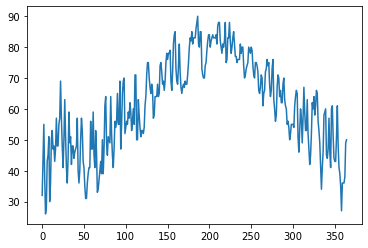

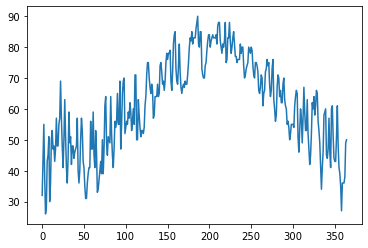

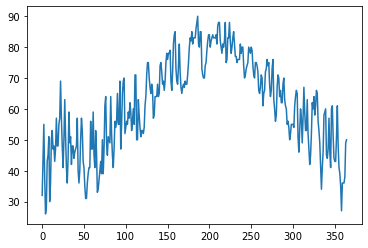

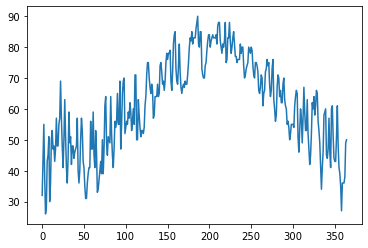

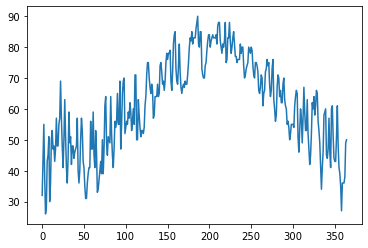

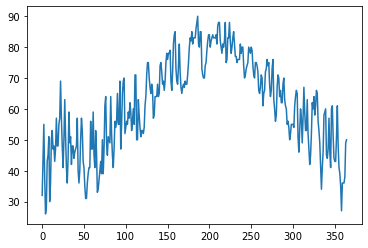

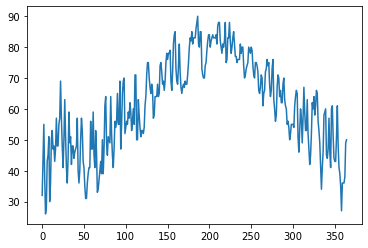

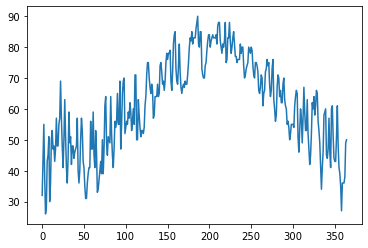

307 ms ± 6.15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [79]:
%%timeit

from itertools import islice

def ssc_2d(filename):
    with open(filename,'r') as f:
        data = (line.strip().split(',') for line in f.readlines())
        x = (int(point[0]) for point in data)
    with open(filename,'r') as f:
        data1 = (line.strip().split(',') for line in f.readlines())
        y = (float(point[1]) for point in data1)
    return x, y

x, y = ssc_2d('files/NorfolkWeatherLong.csv') #nw1999

#plt.plot([*x][:365],[*y][:365])
plt.plot([*islice(x, 0, 365)], [*islice(y, 0, 365)])
plt.show()

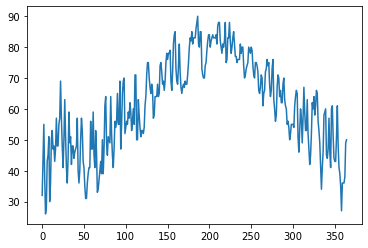

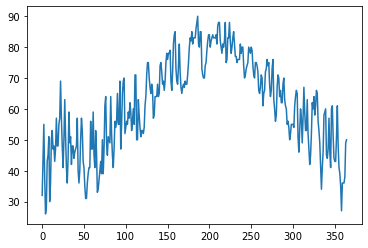

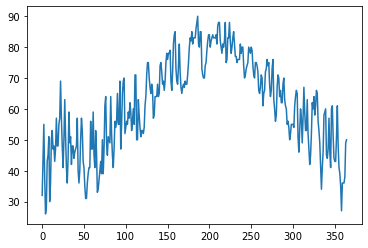

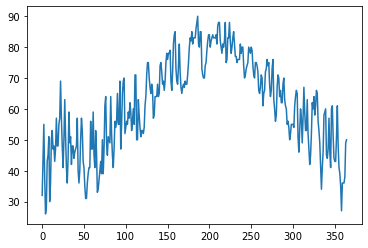

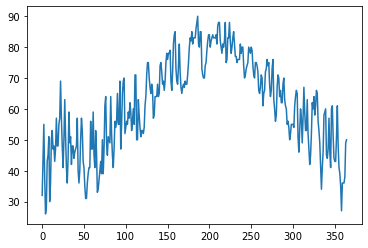

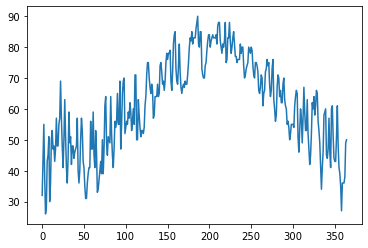

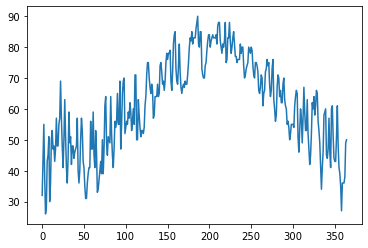

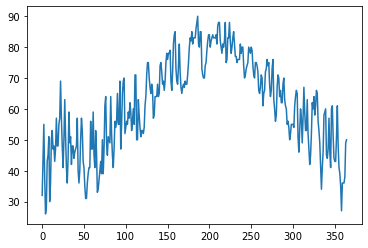

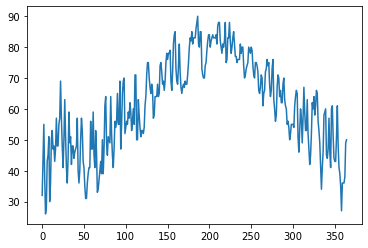

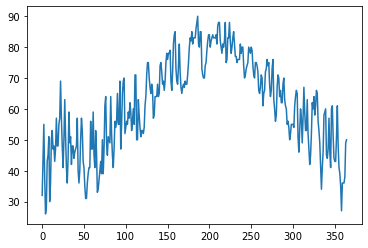

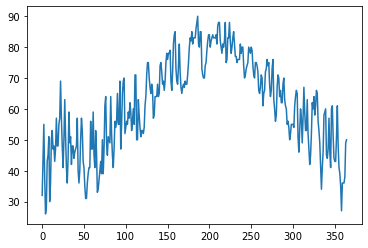

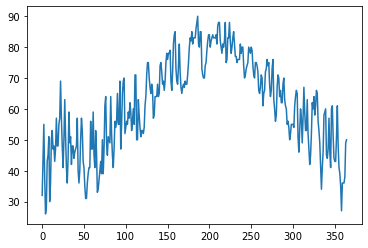

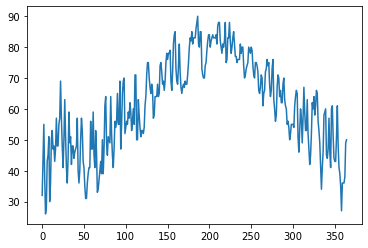

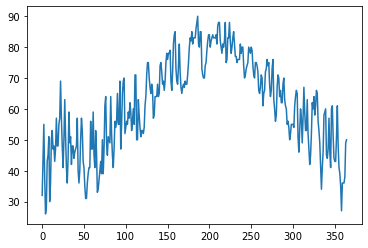

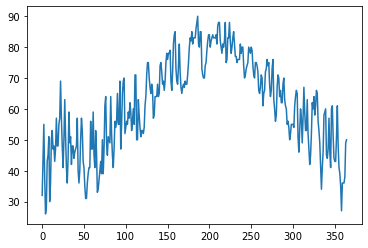

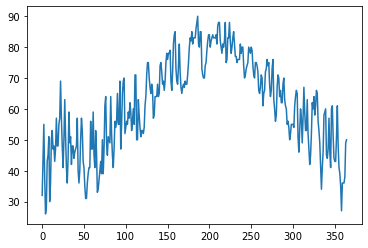

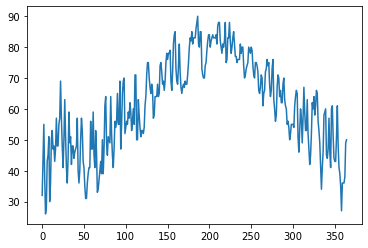

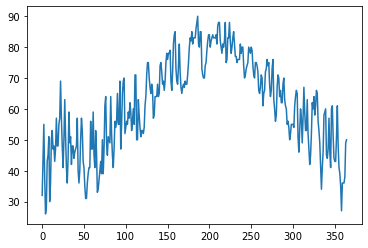

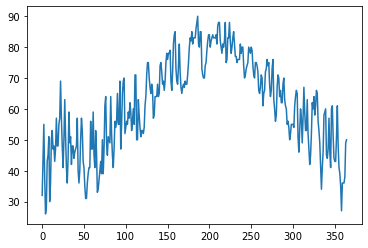

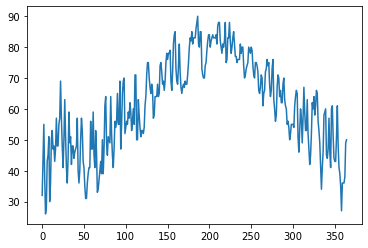

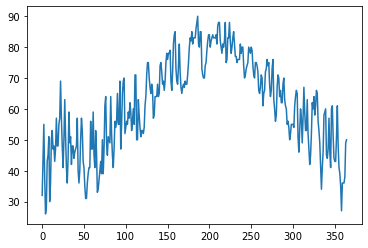

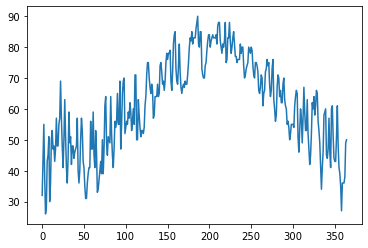

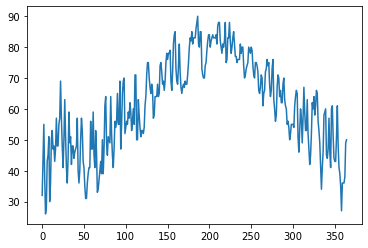

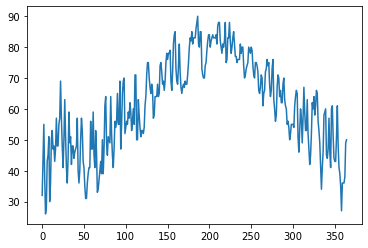

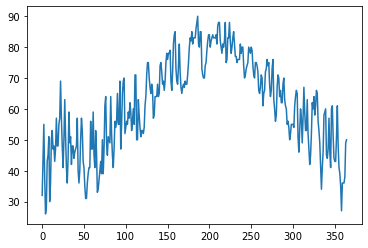

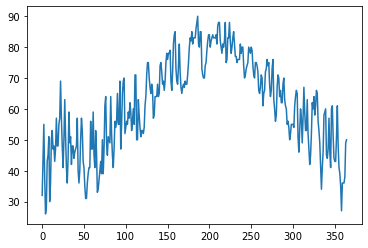

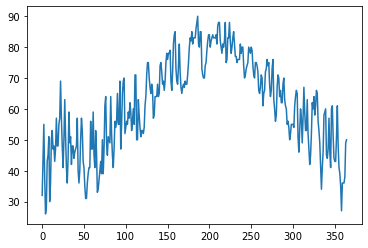

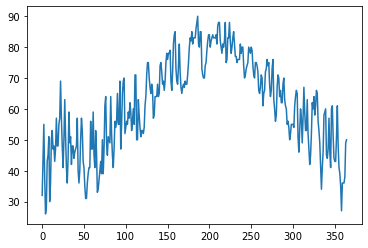

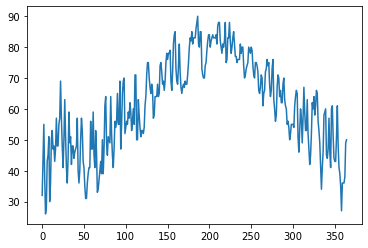

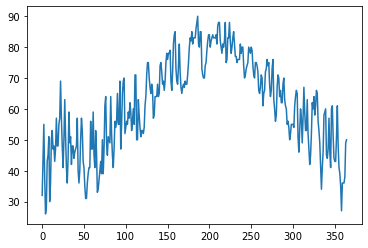

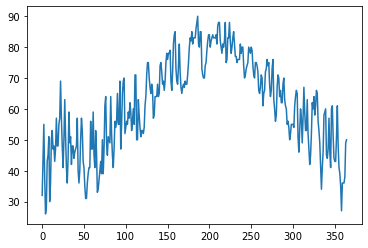

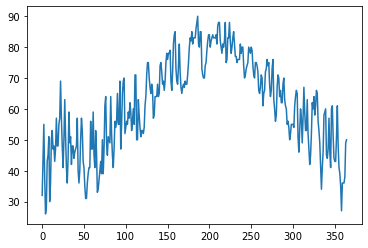

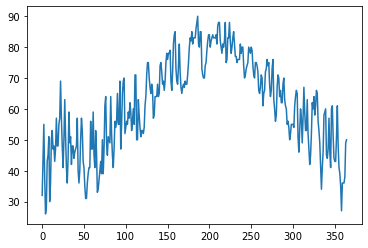

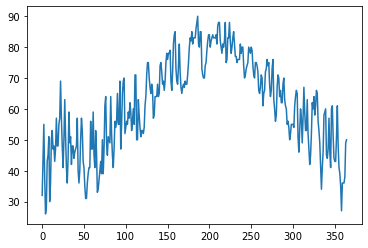

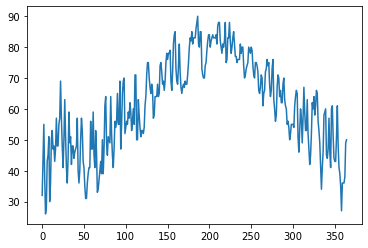

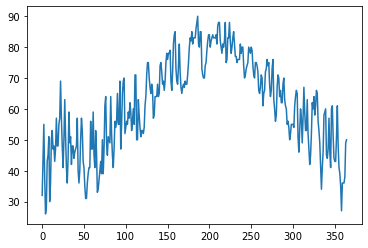

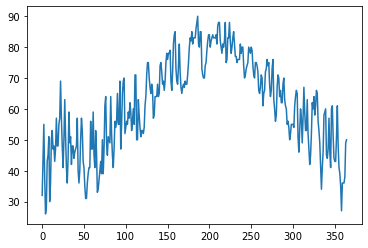

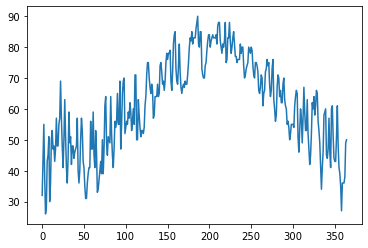

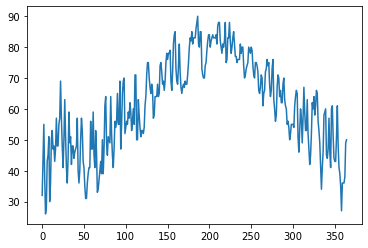

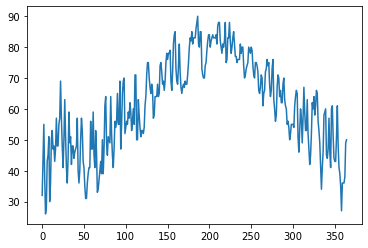

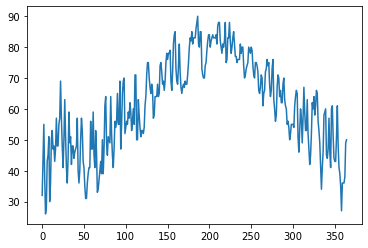

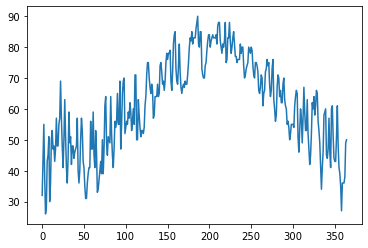

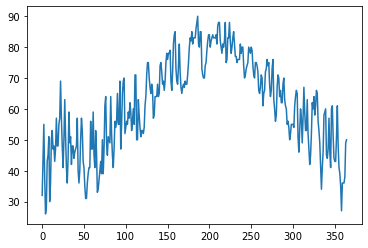

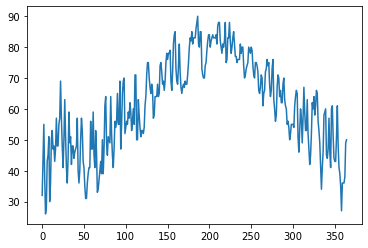

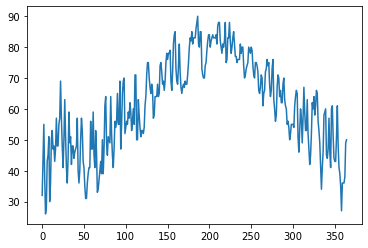

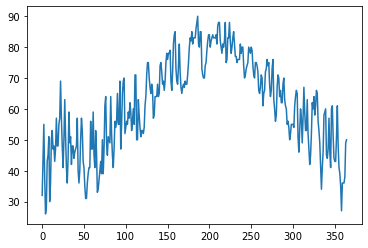

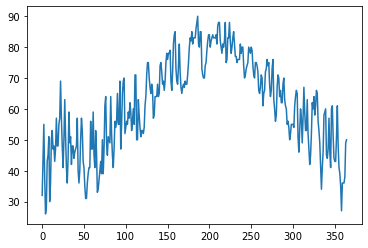

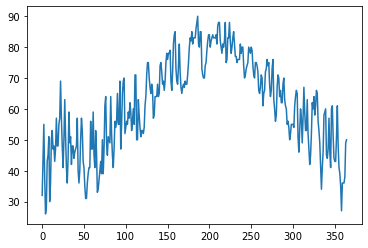

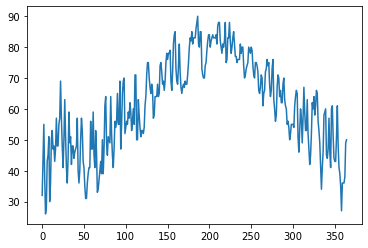

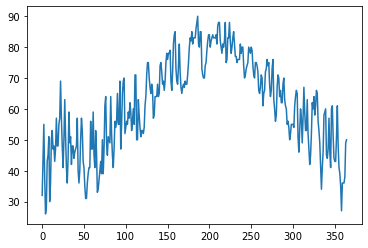

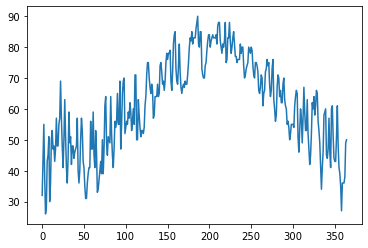

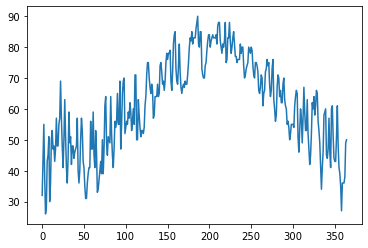

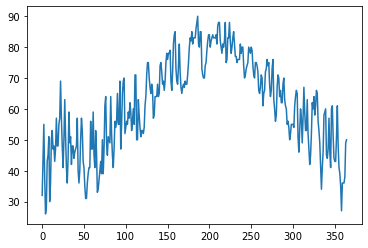

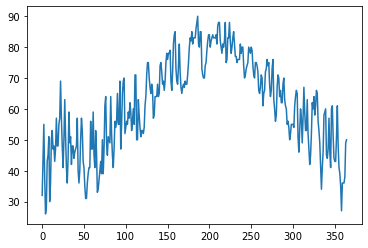

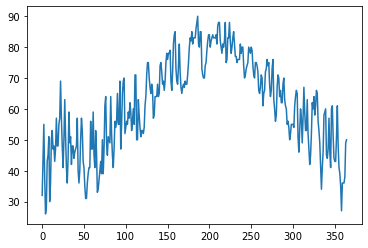

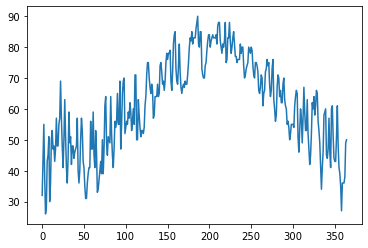

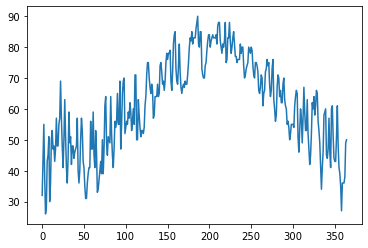

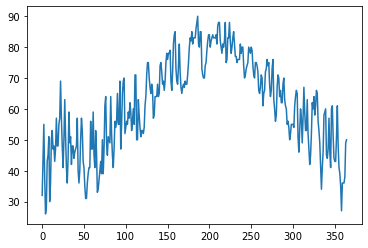

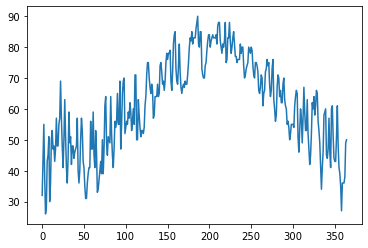

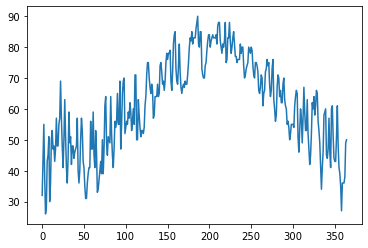

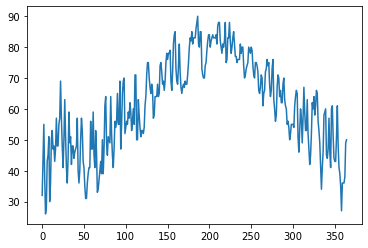

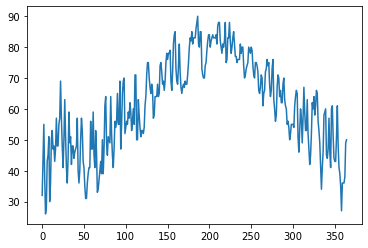

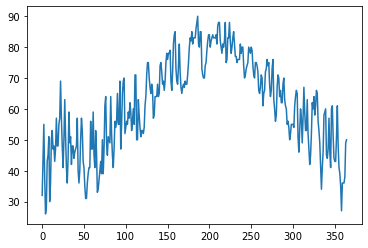

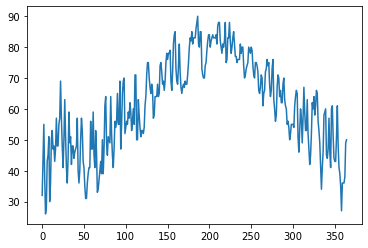

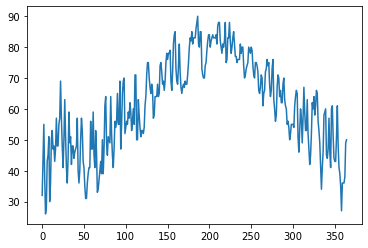

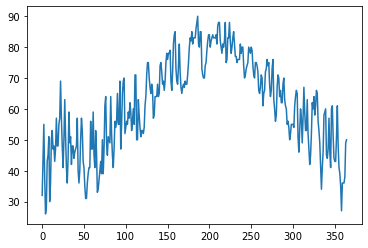

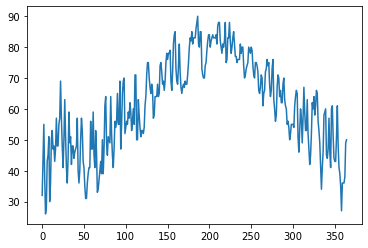

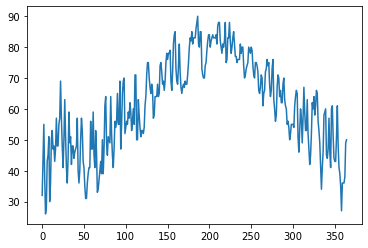

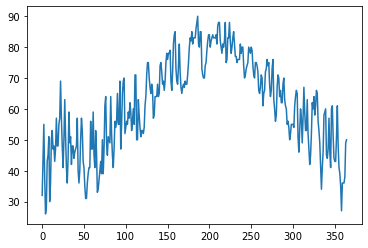

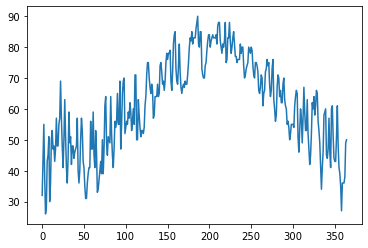

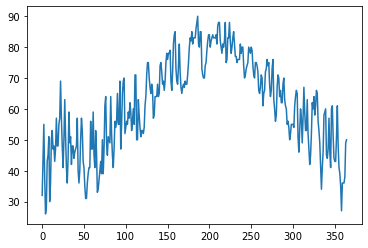

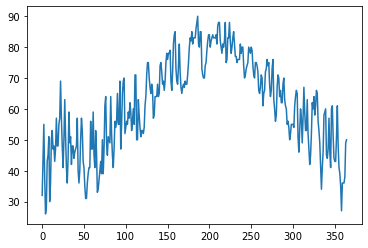

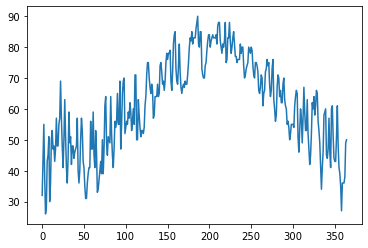

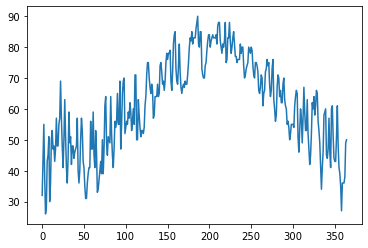

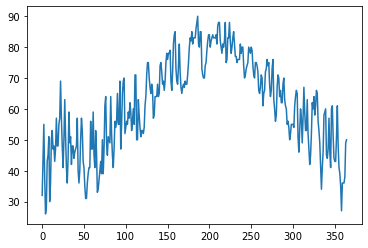

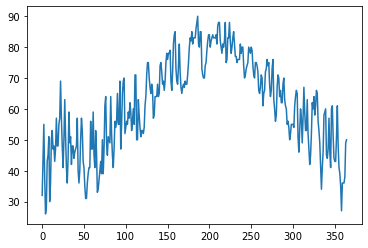

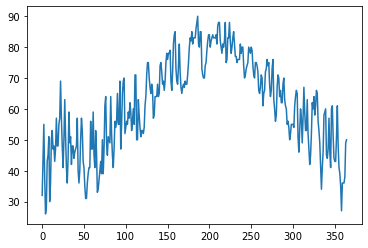

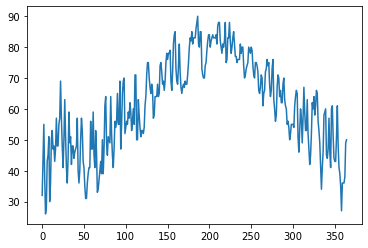

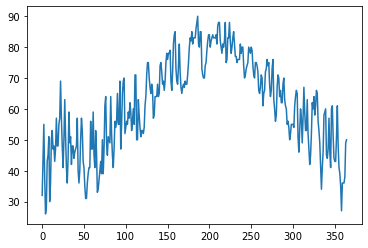

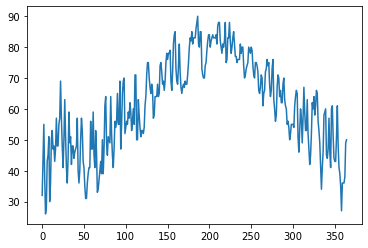

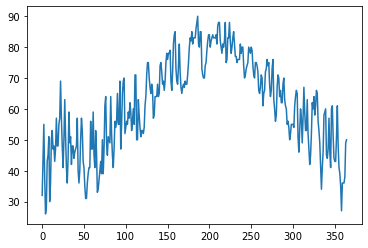

215 ms ± 1.31 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [80]:
%%timeit

from itertools import islice

def ssc_2d(filename):
    with open(filename,'r') as f:
        data = (line.strip().split(',') for line in f.readlines())
        data = ((int(point[0]), float(point[1])) for point in data)
    return data

x = ssc_2d('files/NorfolkWeatherLong.csv')

plt.plot(*zip(*islice(x, 0, 365)))
plt.show()

The generator approaches are much faster than using the basic Python methods below.

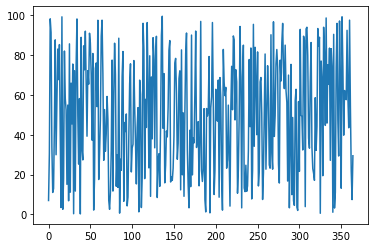

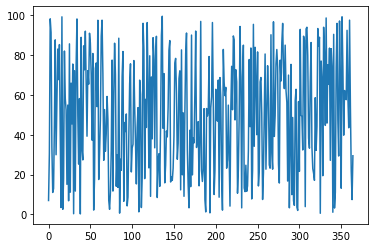

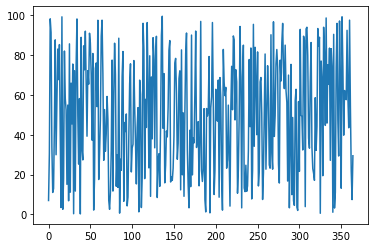

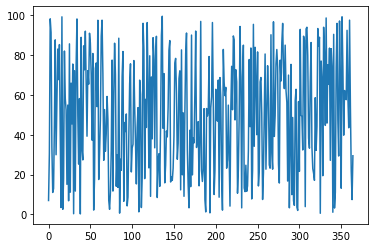

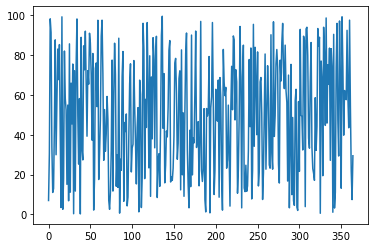

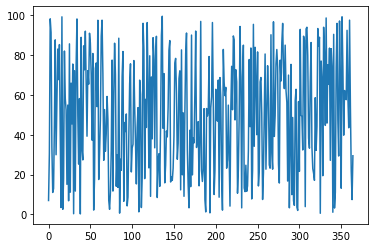

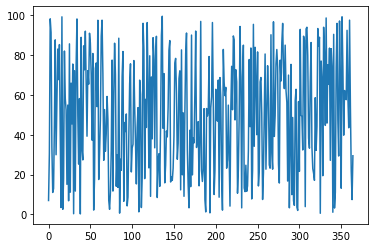

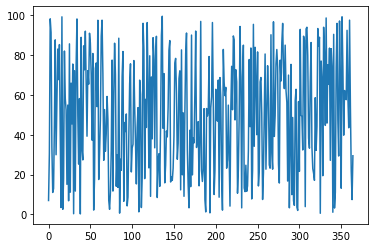

1.35 s ± 17.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [126]:
%%timeit 

def ssc_2d(file_name):
    with open(file_name,'r') as f:
        data = [line.strip().split(',') for line in f.readlines()]
        data = [[int(point[0]), float(point[1])] for point in data]
        return data

filename = 'files/NorfolkWeatherLong.csv'
nw1999 = ssc_2d(filename)
x = [p[0] for p in nw1999] 
y = [p[1] for p in nw1999] 
plt.plot(x[:365],y[:365])
plt.show()

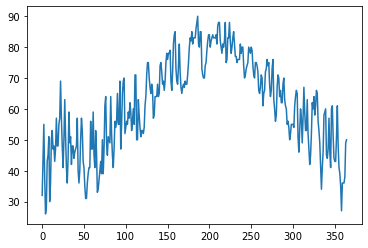

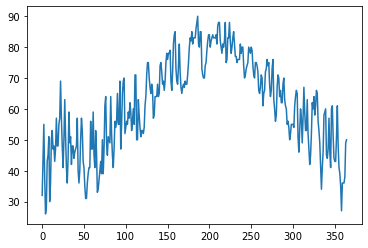

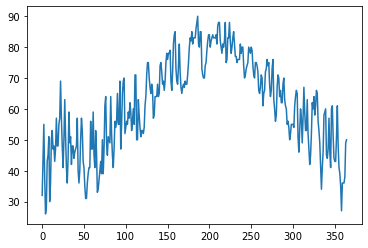

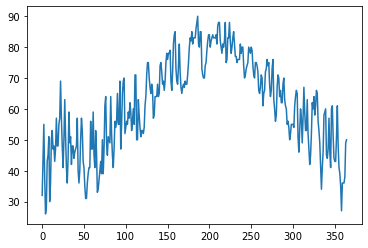

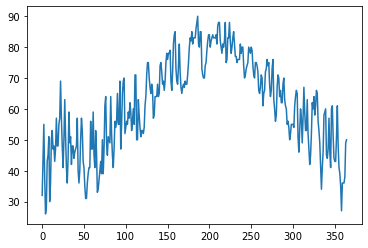

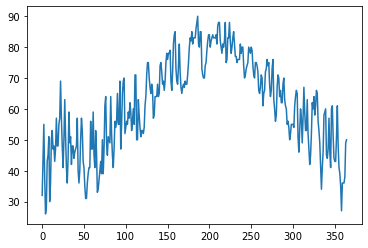

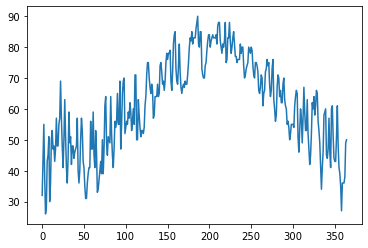

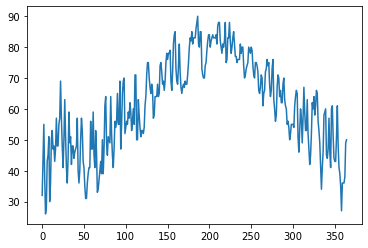

1.31 s ± 23 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [75]:
%%timeit

def ssc_2d(filename):
    with open(filename,'r') as f:
        data = (line.strip().split(',') for line in f.readlines())
        x = (int(x[0]) for x in data)
    with open(filename,'r') as f:
        data = (line.strip().split(',') for line in f.readlines())
        y = (float(x[1]) for x in data)
    return x, y #points

x, y = ssc_2d('files/NorfolkWeatherLong.csv')

#plt.plot([*x][:365],[*y][:365])
plt.plot(list(x)[:365],list(y)[:365])
plt.show()